In [251]:
library(tidyverse) 
library(ggplot2)
library(dplyr)
library(reshape)
library(ggpubr)
library(cowplot)

# 1. Data sets loading and cleaning

In [252]:
Canada_economic_indicators <- read.csv('Canada_economic_indicators.csv')
Canada_economic_indicators_pct <- read.csv('Canada_economic_indicators_pct.csv')
earning_pct <- read.csv('earnings_pct.csv')
earning <- read.csv('earnings.csv')
industry_gdp <- read.csv('industry_gdp.csv')
industry_gdp_pct <- read.csv('industry_gdp_pct.csv')

Canada_economic_indicators <- transform(Canada_economic_indicators, Year = as.character(Canada_economic_indicators$Year))
Canada_economic_indicators_pct <- transform(Canada_economic_indicators_pct, Year = as.character(Canada_economic_indicators$Year))
colnames(Canada_economic_indicators) <- c("Geography", "Year", "Expenditure based GDP (2012 chained C$)", "Expenditure based GDP (current C$)", "Income based GDP (current C$)", "Industry GDP (current C$)", "Industry GDP (chained C$)", "CPI all-items", "CPI gasoline", "Labour force", 'Employment', 'Unemployment', 'Unemployment rate', 'Population', "Expenditure based GDPpC (2012 chained C$)", "Expenditure based GDPpC (current C$)", "Income based GDPpC (current C$)", "Industry GDPpC (current C$)", "Industry GDPpC (chained C$)")
colnames(Canada_economic_indicators_pct) <- c("Geography", "Year", "Expenditure based GDP (2012 chained C$)", "Expenditure based GDP (current C$)", "Income based GDP (current C$)", "Industry GDP (current C$)", "Industry GDP (chained C$)", "CPI all-items", "CPI gasoline", "Labour force", 'Employment', 'Unemployment', 'Unemployment rate', 'Population', "Expenditure based GDPpC (2012 chained C$)", "Expenditure based GDPpC (current C$)", "Income based GDPpC (current C$)", "Industry GDPpC (current C$)", "Industry GDPpC (chained C$)")
Canada_economic_indicators$'Unemployment rate' <- Canada_economic_indicators$'Unemployment' / Canada_economic_indicators$"Labour force"
Canada_economic_indicators_pct$'Unemployment rate' <- Canada_economic_indicators$'Unemployment' / Canada_economic_indicators$"Labour force"


earning <- transform(earning, Year = as.character(earning$Year))
colnames(earning) <- c("Geography", "Year", "All industries", "Goods producing sector", "Service producing sector")
earning_pct <- transform(earning_pct, Year = as.character(earning$Year))
colnames(earning_pct) <- c("Geography", "Year", "All industries", "Goods producing sector", "Service producing sector")

industry_gdp <- transform(industry_gdp, Year = as.character(industry_gdp$Year))
colnames(industry_gdp) <- c("Geography", 'Industry', "Year", "Industry GDP (current C$)", "Industry GDP (chained C$)")
industry_gdp_pct <- transform(industry_gdp_pct, Year = as.character(industry_gdp$Year))
colnames(industry_gdp_pct) <- c("Geography", 'Industry', "Year", "Industry GDP (current C$)", "Industry GDP (chained C$)")

# 2. Filters for visualizations

In [253]:
year = 2019
geo = 'British Columbia'

# 3. Data analysis

In [254]:
first_gdp <- Canada_economic_indicators %>%
    filter(Geography == geo, Year == year) %>%
    select(Year, "Expenditure based GDP (2012 chained C$)", "Expenditure based GDP (current C$)", "Income based GDP (current C$)", "Industry GDP (chained C$)") %>%
    gather(key = "variable", value = "value", -Year) %>%
    ggplot() +
    aes(x = Year, y = value) +
    geom_col(alpha=FALSE, aes(fill = variable)) + facet_wrap(~variable, nrow = 1) + geom_text(aes(label=scales::dollar(value), size=40, vjust=3, color=variable, fontface = "bold")) +
    labs(title='GDP Amount', x='GDP (Dollars x 1,000,000)') +
    scale_y_continuous(labels = scales::label_dollar()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        strip.text.x = element_text(size = 18)) 

two <- Canada_economic_indicators %>%
    filter(Geography == geo, Year <= year) %>%
    select(Year, "Expenditure based GDP (2012 chained C$)", "Expenditure based GDP (current C$)", "Income based GDP (current C$)", "Industry GDP (chained C$)") %>%
    gather(key = "variable", value = "value", -Year) %>%
    ggplot() +
    aes(x = Year, y = value) +
    geom_area(aes(fill = variable, group = 1)) + facet_grid(variable~.) +
    labs(title='GDP Evolution', y='GDP (Dollars x 1,000,000)', x='Year') +
    scale_y_continuous(labels = scales::label_dollar()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.ticks.y=element_blank(),
        axis.text.y=element_text(size=12),
        axis.text.x=element_text(size=12),
        axis.ticks.x=element_blank(),
        strip.text.y.right = element_blank()) 

three <- Canada_economic_indicators_pct %>%
    filter(Geography == geo, Year <= year) %>%
    select(Year, "Expenditure based GDP (2012 chained C$)", "Expenditure based GDP (current C$)", "Income based GDP (current C$)", "Industry GDP (chained C$)") %>%
    gather(key = "variable", value = "value", -Year) %>%
    ggplot() +
    aes(x = Year, y = value) +
    geom_col(aes(fill = variable)) + facet_grid(variable~.) + geom_text(aes(label=scales::percent(value), vjust=-1)) + 
    labs(title='GDP Growth Rate', y='Growth Rate %', x='Year') +
    scale_y_continuous(labels = scales::label_percent()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.ticks.y=element_blank(),
        axis.text.y=element_text(size=12),
        axis.text.x=element_text(size=12),
        axis.ticks.x=element_blank(),
        strip.text.y.right = element_text(size = 15, angle = 0)) 

second_gdp <- ggarrange(two, three, ncol = 2)

first_gdp_capita <- Canada_economic_indicators %>%
    filter(Geography == geo, Year == year) %>%
    select(Year, "Expenditure based GDPpC (2012 chained C$)", "Expenditure based GDPpC (current C$)", "Income based GDPpC (current C$)", "Industry GDPpC (chained C$)") %>%
    gather(key = "variable", value = "value", -Year) %>%
    ggplot() +
    aes(x = Year, y = value) +
    geom_col(alpha=FALSE, aes(fill = variable)) + facet_wrap(~variable, nrow = 1) + geom_text(aes(label=scales::dollar(value), size=40, vjust=3, color=variable, fontface = "bold")) +
    labs(title='GDP per Capita') +
    scale_y_continuous(labels = scales::label_dollar()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.title.x=element_blank(),
        axis.text.y=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        strip.text.x = element_text(size = 18)) 

four <- Canada_economic_indicators %>%
    filter(Geography == geo, Year <= year) %>%
    select(Year, "Expenditure based GDPpC (2012 chained C$)", "Expenditure based GDPpC (current C$)", "Income based GDPpC (current C$)", "Industry GDPpC (chained C$)") %>%
    gather(key = "variable", value = "value", -Year) %>%
    ggplot() +
    aes(x = Year, y = value) +
    geom_area(aes(fill = variable, group = 1)) + facet_grid(variable~.) +
    labs(title='GDP per Capita Evolution', y='GDP per Capita', x='Year') +
    scale_y_continuous(labels = scales::label_dollar()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.ticks.y=element_blank(),
        axis.text.y=element_text(size=12),
        axis.text.x=element_text(size=12),
        axis.ticks.x=element_blank(),
        strip.text.y.right = element_blank()) 

five <- Canada_economic_indicators_pct %>%
    filter(Geography == geo, Year <= year) %>%
    select(Year, "Expenditure based GDPpC (2012 chained C$)", "Expenditure based GDPpC (current C$)", "Income based GDPpC (current C$)", "Industry GDPpC (chained C$)") %>%
    gather(key = "variable", value = "value", -Year) %>%
    ggplot() +
    aes(x = Year, y = value) +
    geom_col(aes(fill = variable)) + facet_grid(variable~.) + geom_text(aes(label=scales::percent(value), vjust=-1)) + 
    labs(title='GDP per Capita Growth Rate', y='Growth Rate %', x='Year') +
    scale_y_continuous(labels = scales::label_percent()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.ticks.y=element_blank(),
        axis.text.y=element_text(size=12),
        axis.text.x=element_text(size=12),
        axis.ticks.x=element_blank(),
        strip.text.y.right = element_text(size = 15, angle = 0)) 

second_gdp_capita <- ggarrange(four, five, ncol = 2)

six <- Canada_economic_indicators %>%
    filter(Geography == geo, Year <= year) %>%
    select(Year, "CPI all-items", "CPI gasoline") %>%
    gather(key = "variable", value = "value", -Year) %>%
    ggplot() +
    aes(x = Year, y = value) +
    geom_area(aes(fill = variable, group = 1)) + facet_grid(variable~.) + geom_text(aes(label=value, vjust=-1, fontface='bold')) +
    labs(title='CPI Evolution', y='2002 = 100%', x='Year') +
    scale_y_continuous(labels = scales::label_comma()) +
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.ticks.y=element_blank(),
        axis.text.y=element_text(size=12),
        axis.text.x=element_text(size=12),
        axis.ticks.x=element_blank(),
        strip.text.x = element_text(size = 18))

seven <- Canada_economic_indicators_pct %>%
    filter(Geography == geo, Year <= year) %>%
    select(Year, "CPI all-items", "CPI gasoline") %>%
    gather(key = "variable", value = "value", -Year) %>%
    ggplot() +
    aes(x = Year, y = value) +
    geom_col(aes(fill = variable)) + facet_grid(variable~.) + geom_text(aes(label=scales::percent(value), vjust=-1)) + 
    labs(title='CPI Growth Rate', y='Growth Rate %', x='Year') +
    scale_y_continuous(labels = scales::label_percent()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.ticks.y=element_blank(),
        axis.text.y=element_text(size=12),
        axis.text.x=element_text(size=12),
        axis.ticks.x=element_blank(),
        strip.text.x = element_text(size = 18)) 

first_cpi <- ggarrange(six, seven, ncol = 2)

eight <- Canada_economic_indicators %>%
    filter(Geography == geo, Year <= year) %>%
    select(Year, 'Unemployment', 'Employment') %>%
    gather(key = "variable", value = "value", -Year) %>%
    ggplot() +
    aes(x = Year, y = value) +
    geom_col(aes(fill = variable)) + geom_text(aes(label=scales::comma(value), vjust=1.5, fontface='bold')) +
    labs(title='Labour Force Evolution', y='Persons x 1,000', x='Year') +
    scale_y_continuous(labels = scales::label_comma()) +
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'bottom',
        legend.title = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.ticks.y=element_blank(),
        axis.text.y=element_text(size=12),
        axis.text.x=element_text(size=12),
        axis.ticks.x=element_blank(),
        strip.text.x = element_text(size = 18))

nine <- Canada_economic_indicators %>%
    filter(Geography == geo, Year <= year) %>%
    select(Year, "Unemployment rate") %>%
    gather(key = "variable", value = "value", -Year) %>%
    ggplot() +
    aes(x = Year, y = value) +
    geom_area(aes(fill = variable, group = 1))  + geom_text(aes(label=scales::percent(value), vjust=-1, fontface='bold')) +
    labs(title='Unemploymnet Rate Evolution', x='Year') +
    scale_y_continuous(labels = scales::label_percent()) +
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_text(size=12),
        axis.text.x=element_text(size=12),
        axis.ticks.x=element_blank(),
        strip.text.x = element_text(size = 18))

first_employment <- ggarrange(eight, nine, ncol = 2)

ten <- earning %>%
    filter(Geography == geo, Year <= year) %>%
    select(Year, "All industries", "Goods producing sector", "Service producing sector") %>%
    gather(key = "variable", value = "value", -Year) %>%
    ggplot() +
    aes(x = Year, y = value) +
    geom_area(aes(fill = variable, group = 1)) + facet_grid(variable~.) +  geom_text(aes(label=scales::dollar(value), vjust=-1, fontface='bold')) +
    labs(title='Average Weekly Earnings', y='Dollars', x='Year') +
    scale_y_continuous(labels = scales::label_dollar()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.ticks.y=element_blank(),
        axis.text.y=element_text(size=12),
        axis.text.x=element_text(size=12),
        axis.ticks.x=element_blank(),
        strip.text.y.right = element_blank()) 

eleven <- earning_pct %>%
    filter(Geography == geo, Year <= year) %>%
    select(Year, "All industries", "Goods producing sector", "Service producing sector") %>%
    gather(key = "variable", value = "value", -Year) %>%
    ggplot() +
    aes(x = Year, y = value) +
    geom_col(aes(fill = variable)) + facet_grid(variable~.) + geom_text(aes(label=scales::percent(value), vjust=-1)) + 
    labs(title='Average Weekly Earnings Evolution', y='Growth Rate %', x='Year') +
    scale_y_continuous(labels = scales::label_percent()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.ticks.y=element_blank(),
        axis.text.y=element_text(size=12),
        axis.text.x=element_text(size=12),
        axis.ticks.x=element_blank(),
        strip.text.y.right = element_text(size = 15, angle = 0)) 

first_earning <- ggarrange(ten, eleven, ncol = 2)

twelve <- Canada_economic_indicators %>%
    filter(Year == year) %>%
    select(Geography, "Expenditure based GDP (current C$)") %>%
    gather(key = "variable", value = "value", -Geography) %>%
    ggplot() +
    aes(x = reorder(Geography, -value), y = value) +
    geom_col(aes(fill = ifelse(Geography == geo, "Highlighted", "Normal"))) +
    labs(title='GDP Amount Geography Comparison', y='GDP (Dollars x 1,000,000)') +
    scale_y_continuous(labels = scales::label_dollar()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.title.x=element_blank(),
        axis.text.x=element_text(size = 10, angle=90),
        axis.ticks.x=element_blank())

thirteen <- Canada_economic_indicators_pct %>%
    filter(Year == year) %>%
    select(Geography, "Expenditure based GDP (current C$)") %>%
    gather(key = "variable", value = "value", -Geography) %>%
    ggplot() +
    aes(x = reorder(Geography, -value), y = value) +
    geom_col(aes(fill = ifelse(Geography == geo, "Highlighted", "Normal"))) +
    labs(title='GDP Growth Rate Geography Comparison') +
    scale_y_continuous(labels = scales::label_percent()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.title.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.x=element_text(size = 10, angle=90),
        axis.ticks.x=element_blank())

third_gdp <- ggarrange(twelve, thirteen, ncol = 2)

fourteen <- Canada_economic_indicators %>%
    filter(Year == year) %>%
    select(Geography, "Expenditure based GDPpC (current C$)") %>%
    gather(key = "variable", value = "value", -Geography) %>%
    ggplot() +
    aes(x = reorder(Geography, -value), y = value) +
    geom_col(aes(fill = ifelse(Geography == geo, "Highlighted", "Normal"))) +
    labs(title='GDP per Capita Geography Comparison', y='Dollars') +
    scale_y_continuous(labels = scales::label_dollar()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.title.x=element_blank(),
        axis.text.x=element_text(size = 10, angle=90),
        axis.ticks.x=element_blank())

fifteen <- Canada_economic_indicators_pct %>%
    filter(Year == year) %>%
    select(Geography, "Expenditure based GDPpC (current C$)") %>%
    gather(key = "variable", value = "value", -Geography) %>%
    ggplot() +
    aes(x = reorder(Geography, -value), y = value) +
    geom_col(aes(fill = ifelse(Geography == geo, "Highlighted", "Normal"))) +
    labs(title='GDP per Capita Growth Rate Geography Comparison') +
    scale_y_continuous(labels = scales::label_percent()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.title.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.x=element_text(size = 10, angle=90),
        axis.ticks.x=element_blank())

third_gdp_capita <- ggarrange(fourteen, fifteen, ncol = 2)

sixteen <- Canada_economic_indicators %>%
    filter(Year == year) %>%
    select(Geography, "CPI all-items") %>%
    gather(key = "variable", value = "value", -Geography) %>%
    ggplot() +
    aes(x = reorder(Geography, -value), y = value) +
    geom_col(aes(fill = ifelse(Geography == geo, "Highlighted", "Normal"))) +
    labs(title='CPI Geography Comparison', y='2002 = 100%') +
    scale_y_continuous(labels = scales::label_comma()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.text.x=element_text(size = 10, angle=90),
        axis.title.x=element_blank(),
        axis.ticks.x=element_blank())

seventeen <- Canada_economic_indicators_pct %>%
    filter(Year == year) %>%
    select(Geography, "CPI all-items") %>%
    gather(key = "variable", value = "value", -Geography) %>%
    ggplot() +
    aes(x = reorder(Geography, -value), y = value) +
    geom_col(aes(fill = ifelse(Geography == geo, "Highlighted", "Normal"))) +
    labs(title='CPI Growth Rate Geography Comparison') +
    scale_y_continuous(labels = scales::label_percent()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.title.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.x=element_text(size = 10, angle=90),
        axis.ticks.x=element_blank())

second_cpi <- ggarrange(sixteen, seventeen, ncol = 2)

second_employment <- Canada_economic_indicators %>%
    filter(Year == year) %>%
    select(Geography, "Unemployment rate") %>%
    gather(key = "variable", value = "value", -Geography) %>%
    ggplot() +
    aes(x = reorder(Geography, -value), y = value) +
    geom_col(aes(fill = ifelse(Geography == geo, "Highlighted", "Normal"))) +
    labs(title='Unemployment Rate Geography Comparison') +
    scale_y_continuous(labels = scales::label_percent()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.title.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.x=element_text(size = 12),
        axis.ticks.x=element_blank())

second_earning <- earning %>%
    filter(Year == year) %>%
    select(Geography, "All industries") %>%
    gather(key = "variable", value = "value", -Geography) %>%
    ggplot() +
    aes(x = reorder(Geography, -value), y = value) +
    geom_col(aes(fill = ifelse(Geography == geo, "Highlighted", "Normal"))) +
    labs(title='Average Weekly Earnings Geography Comparison', y = 'Dollars') +
    scale_y_continuous(labels = scales::label_dollar()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.title.x=element_blank(),
        axis.text.x=element_text(size = 12),
        axis.ticks.x=element_blank())

eighteen <- industry_gdp %>%
    filter(Geography == geo, Year == year) %>%
    select(Industry, "Industry GDP (chained C$)") %>%
    gather(key = "variable", value = "value", -Industry) %>%
    ggplot() +
    aes(y = reorder(Industry, value), x = value) +
    geom_col(aes(fill=variable)) +
    labs(title='GDP Amount by Industry', x='GDP (Dollars x 1,000,000)') +
    scale_x_continuous(labels = scales::label_dollar()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_text(size = 12)) 

nineteen <- industry_gdp_pct %>%
    filter(Geography == geo, Year == year) %>%
    select(Industry, "Industry GDP (chained C$)") %>%
    gather(key = "variable", value = "value", -Industry) %>%
    ggplot() +
    aes(y = reorder(Industry, value), x = value) +
    geom_col(aes(fill = ifelse(value <= 0, "Highlighted", "Normal"))) + geom_text(aes(label=scales::percent(value), hjust=1)) + 
    labs(title='GDP Growth Rate by Industry', x='GDP (Dollars x 1,000,000)') +
    scale_x_continuous(labels = scales::label_percent()) + 
    theme_minimal() + theme( 
        plot.title = element_text(size = 30, face= 'bold', hjust = 0.5),
        legend.position = 'none',
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_text(size = 12)) 

fourth_gdp <- ggarrange(eighteen, nineteen, ncol = 2)

Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (position_stack).”


# 4. Data visualizations

## 1st Tab. "GDP Analysis"

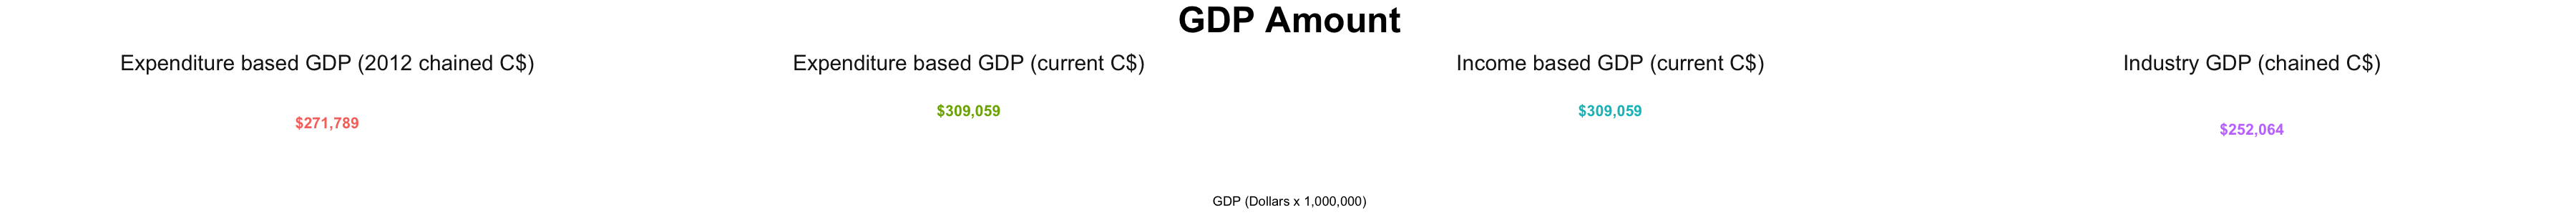

In [255]:
options(repr.plot.width=30, repr.plot.height=2.5)
first_gdp

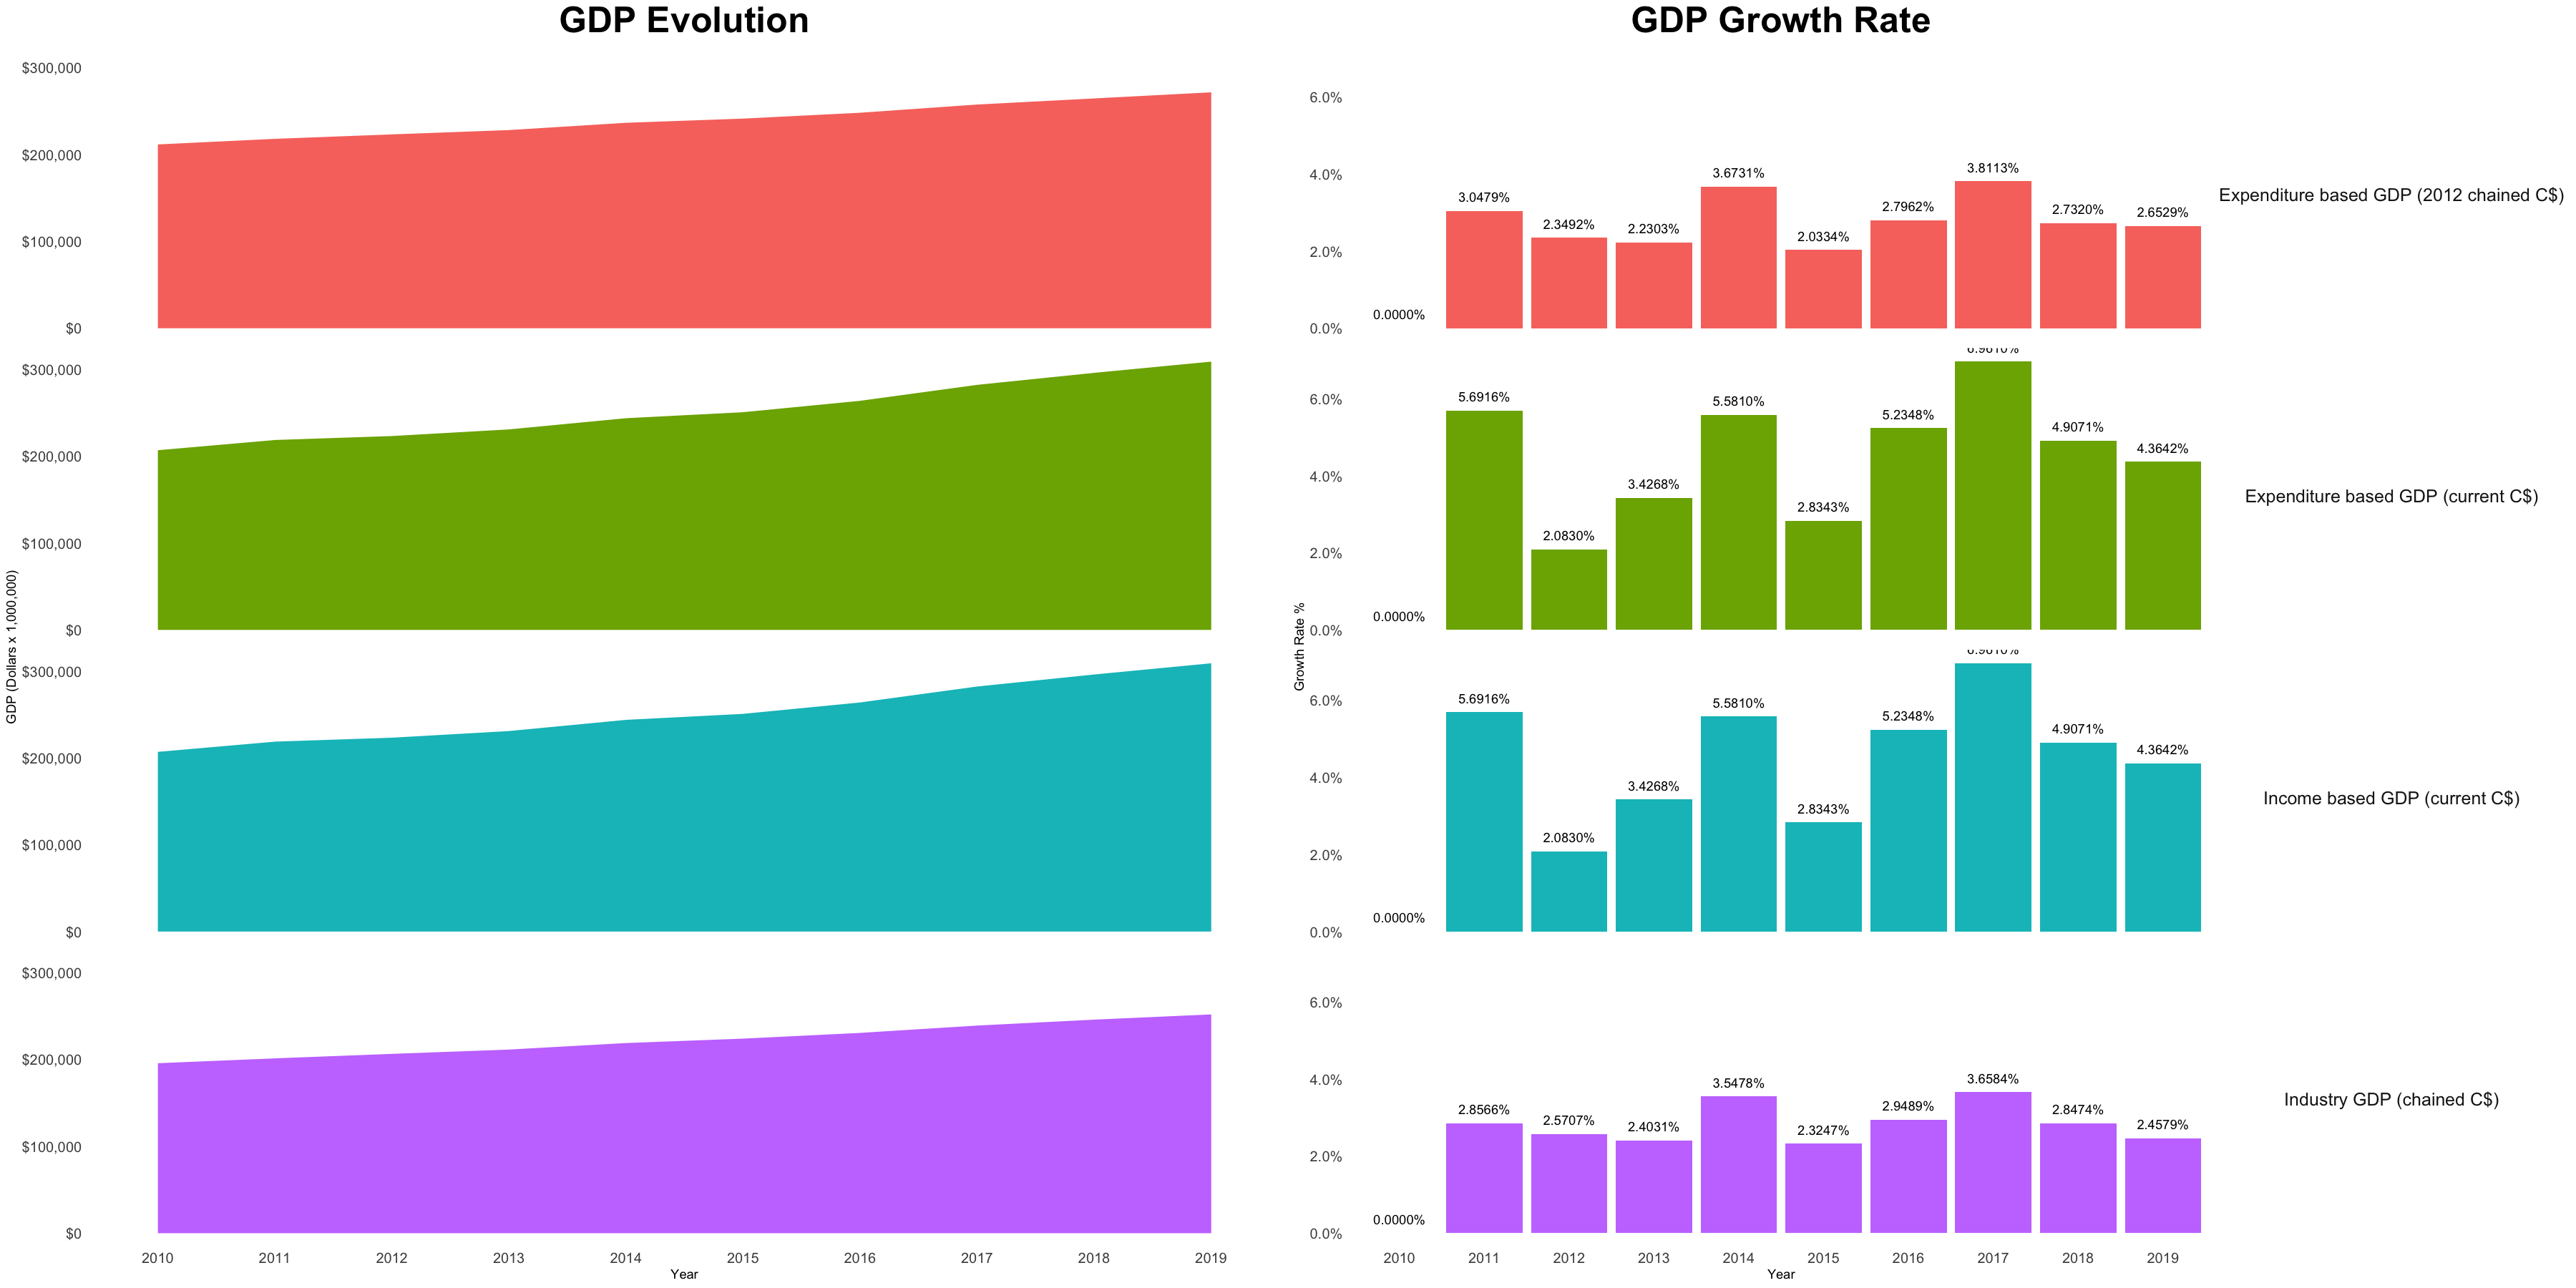

In [256]:
options(repr.plot.width=30, repr.plot.height=15)
second_gdp

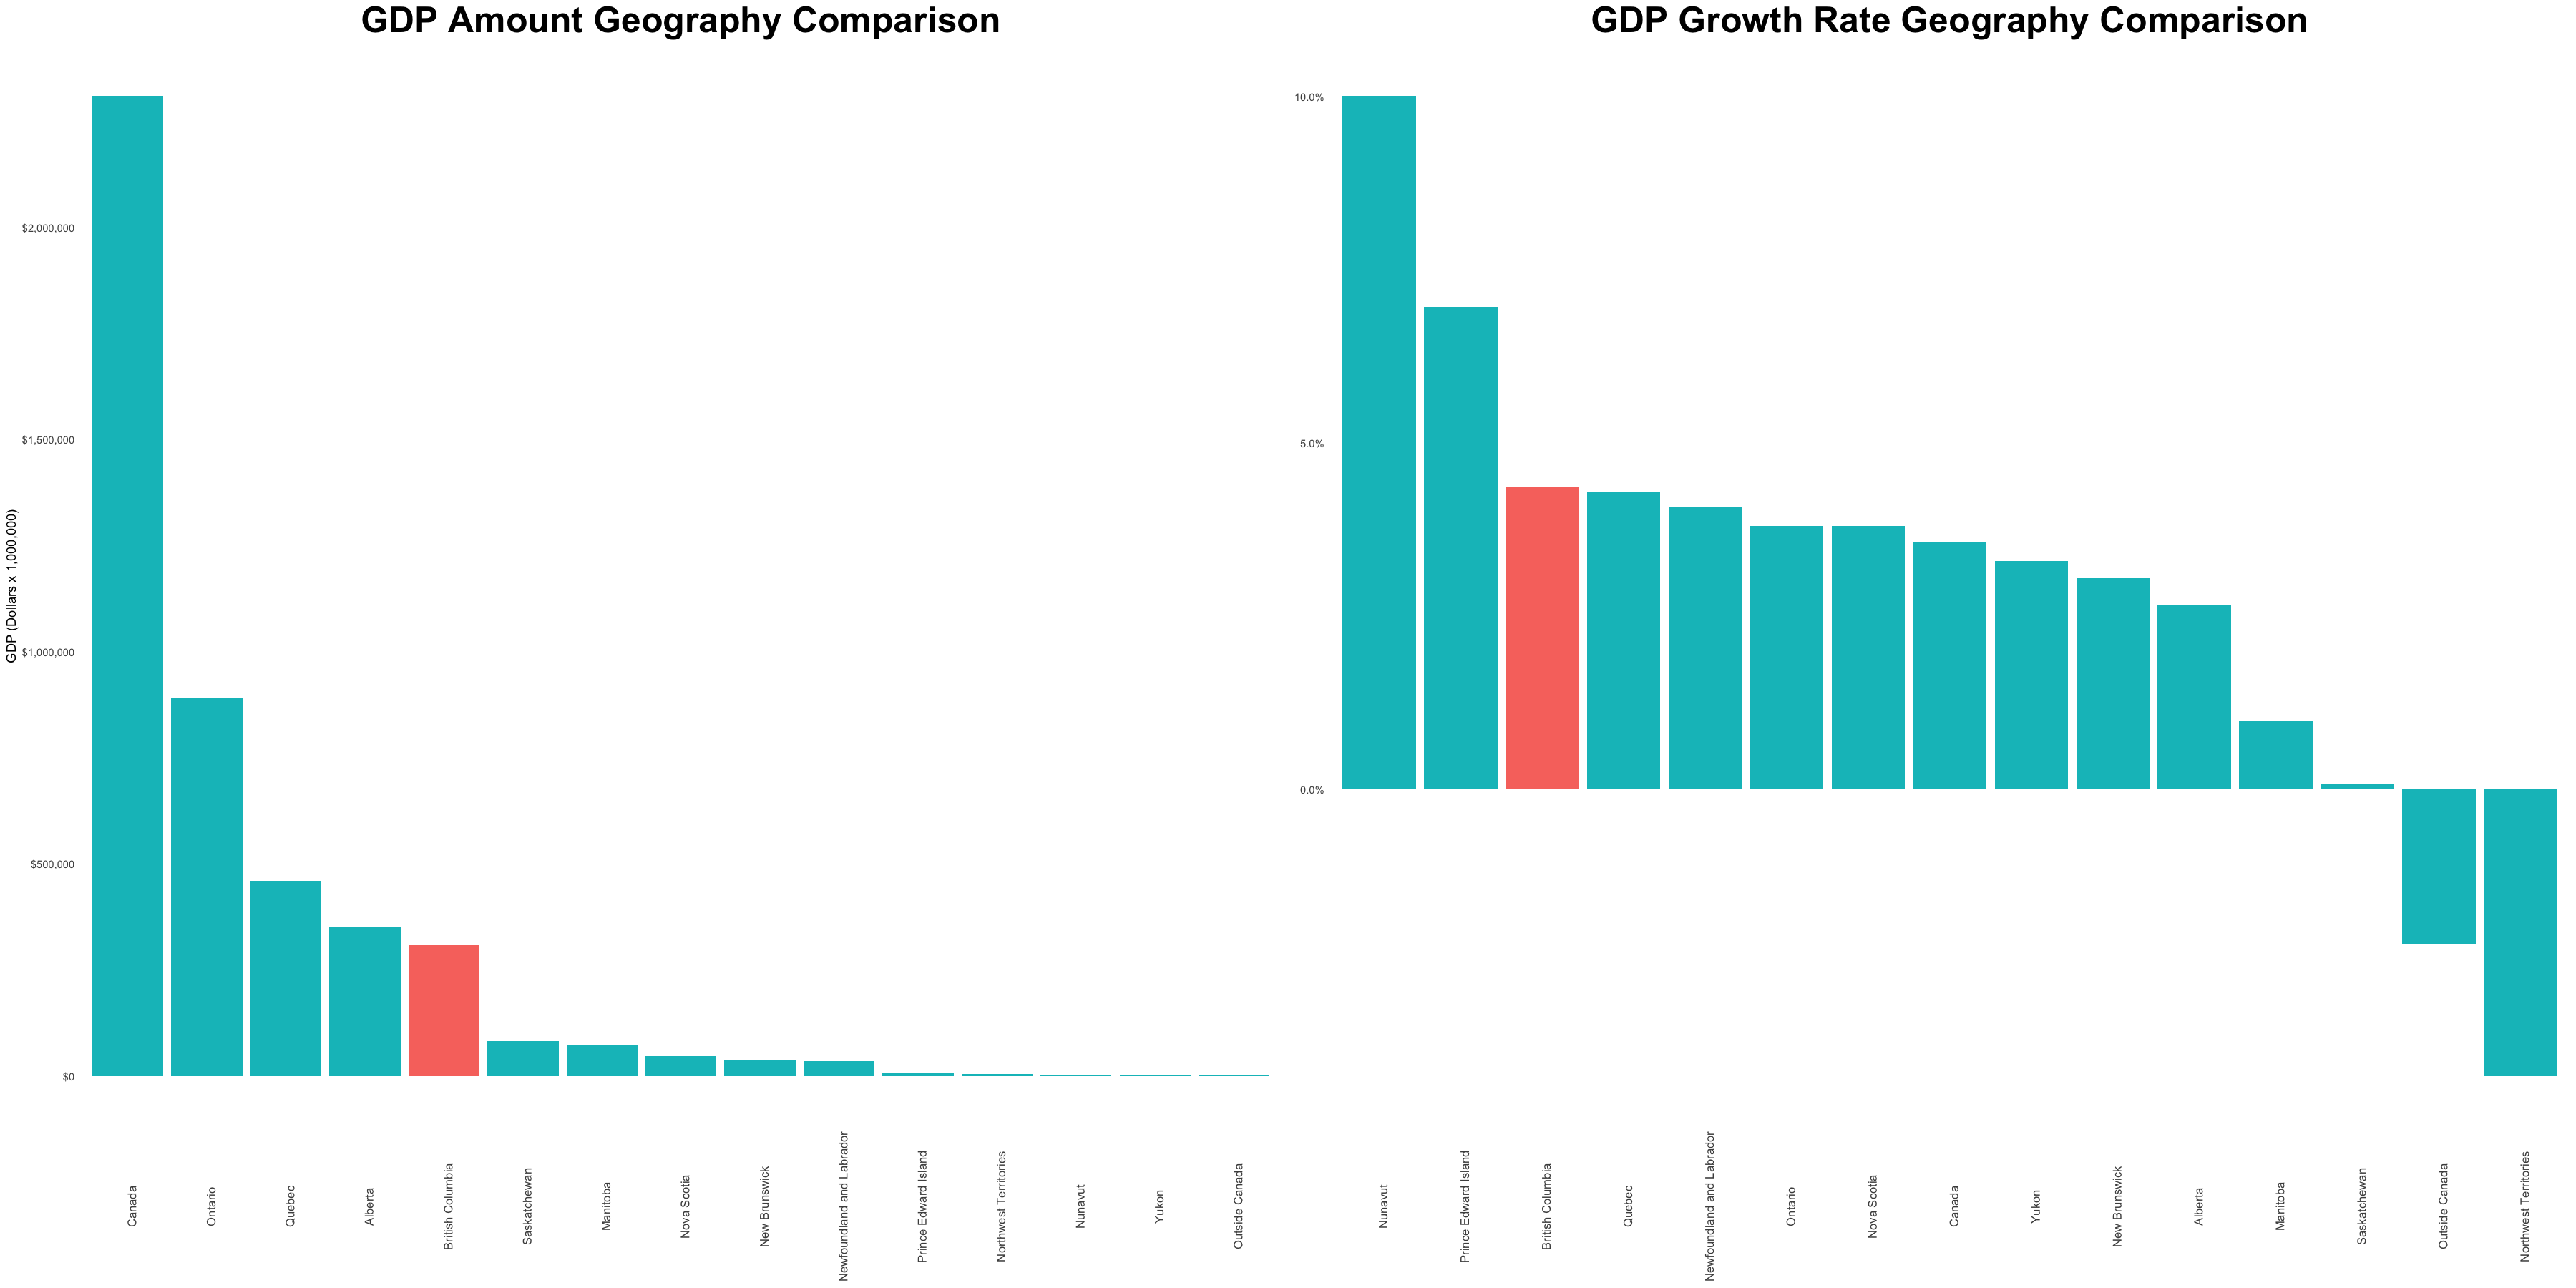

In [257]:
options(repr.plot.width=30, repr.plot.height=15)
third_gdp

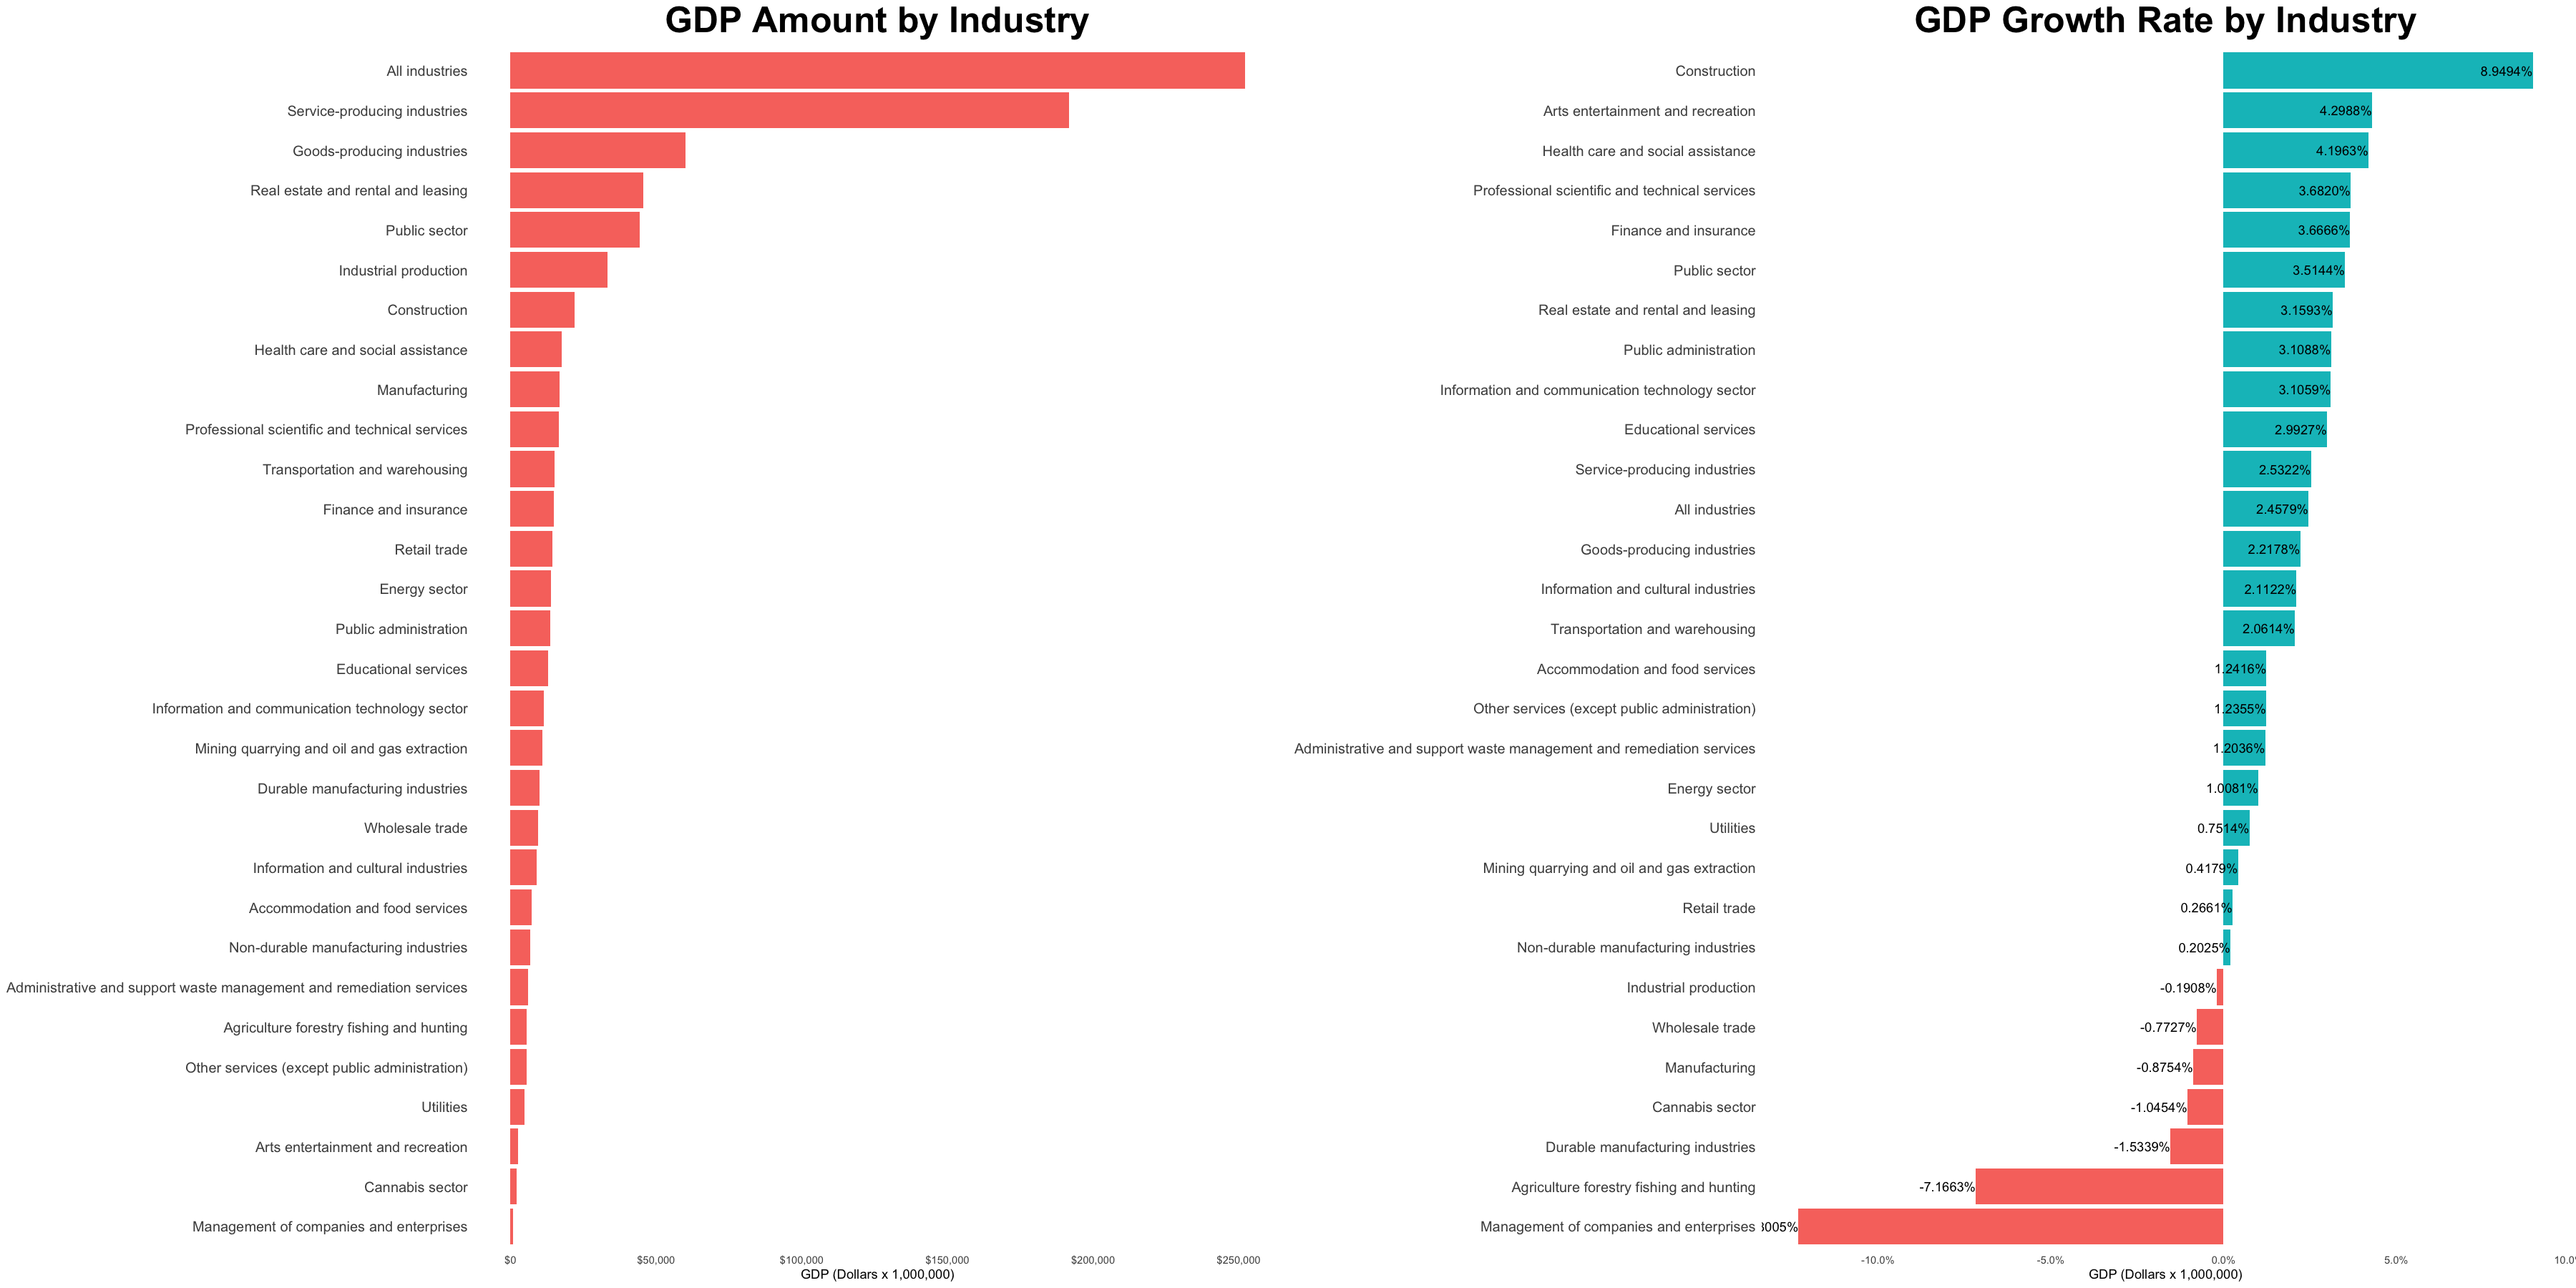

In [258]:
options(repr.plot.width=30, repr.plot.height=15)
fourth_gdp

## 2nd Tab. "GDP per Capita Analysis"

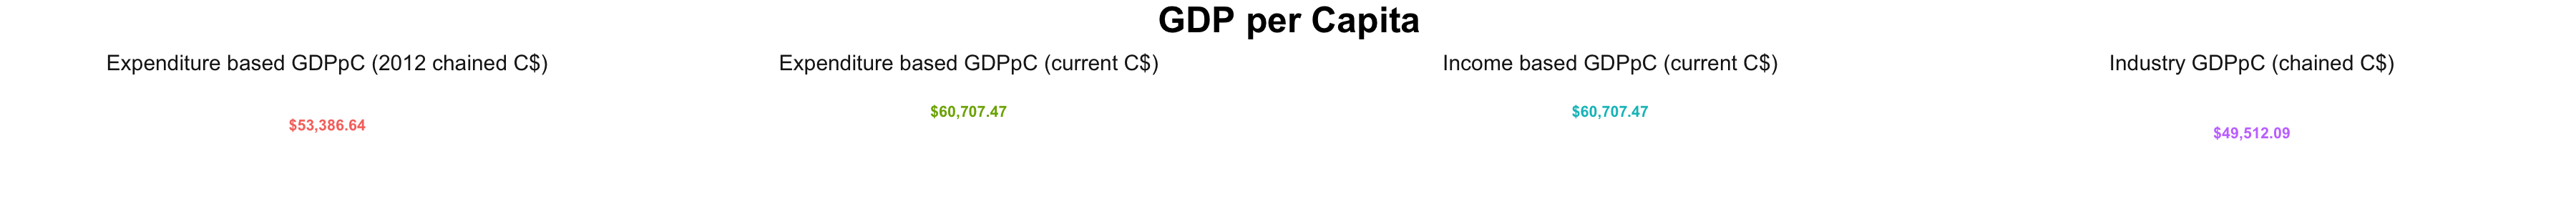

In [259]:
options(repr.plot.width=30, repr.plot.height=2.5)
first_gdp_capita

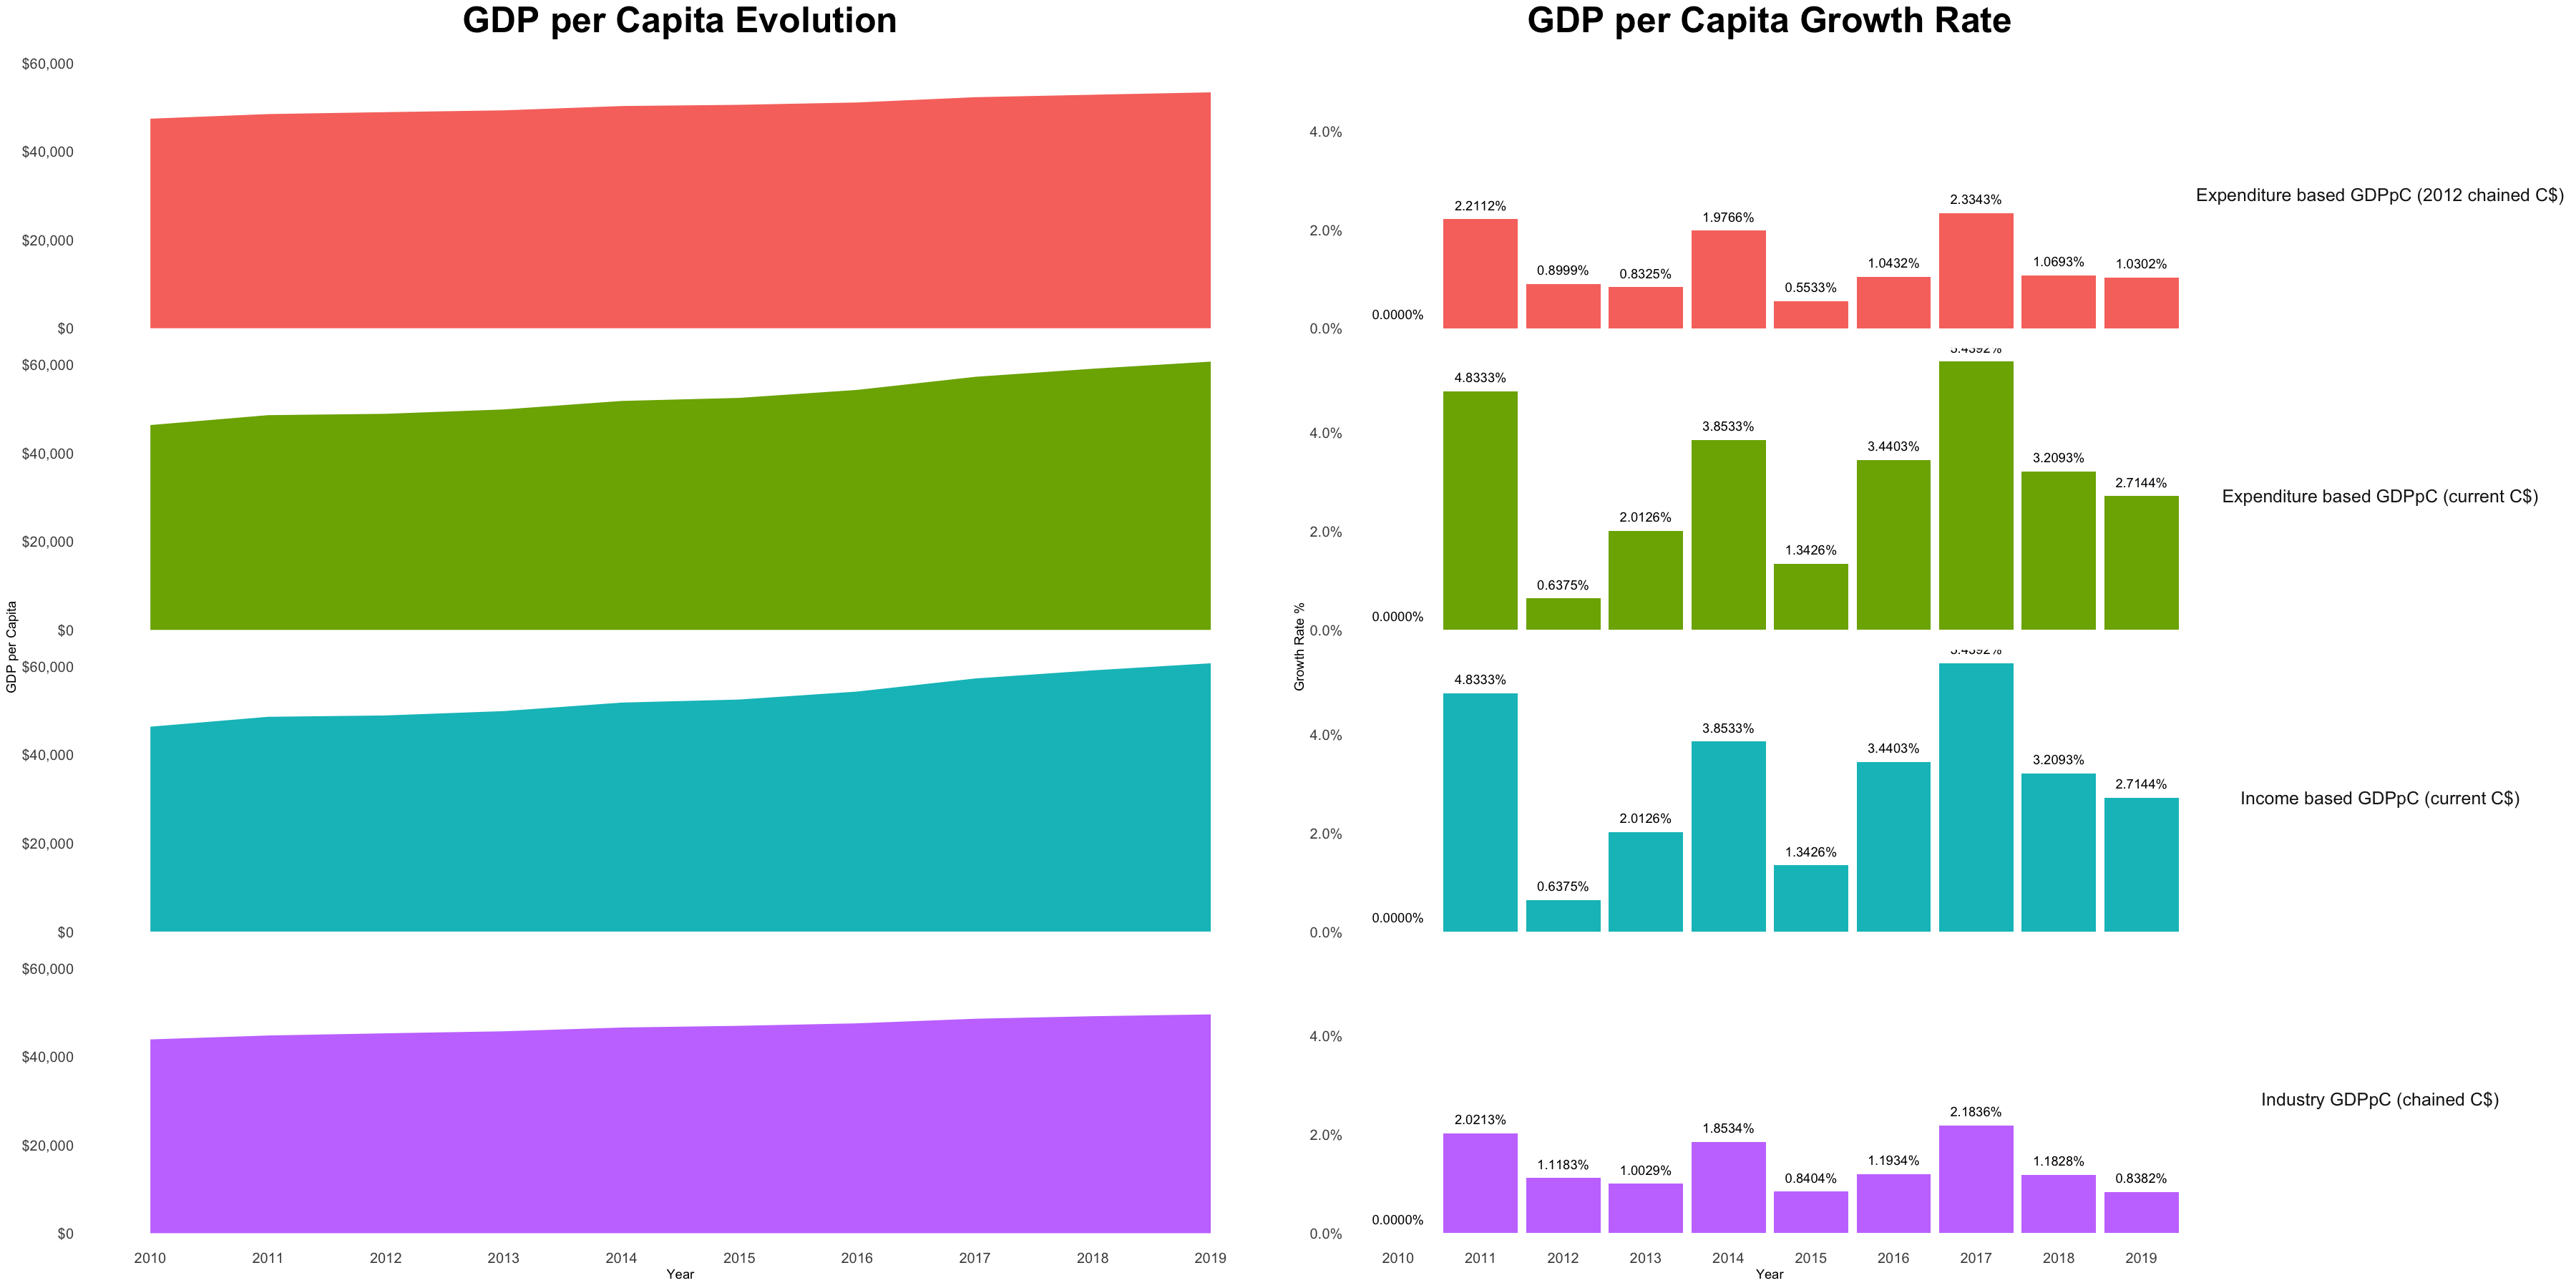

In [260]:
options(repr.plot.width=30, repr.plot.height=15)
second_gdp_capita

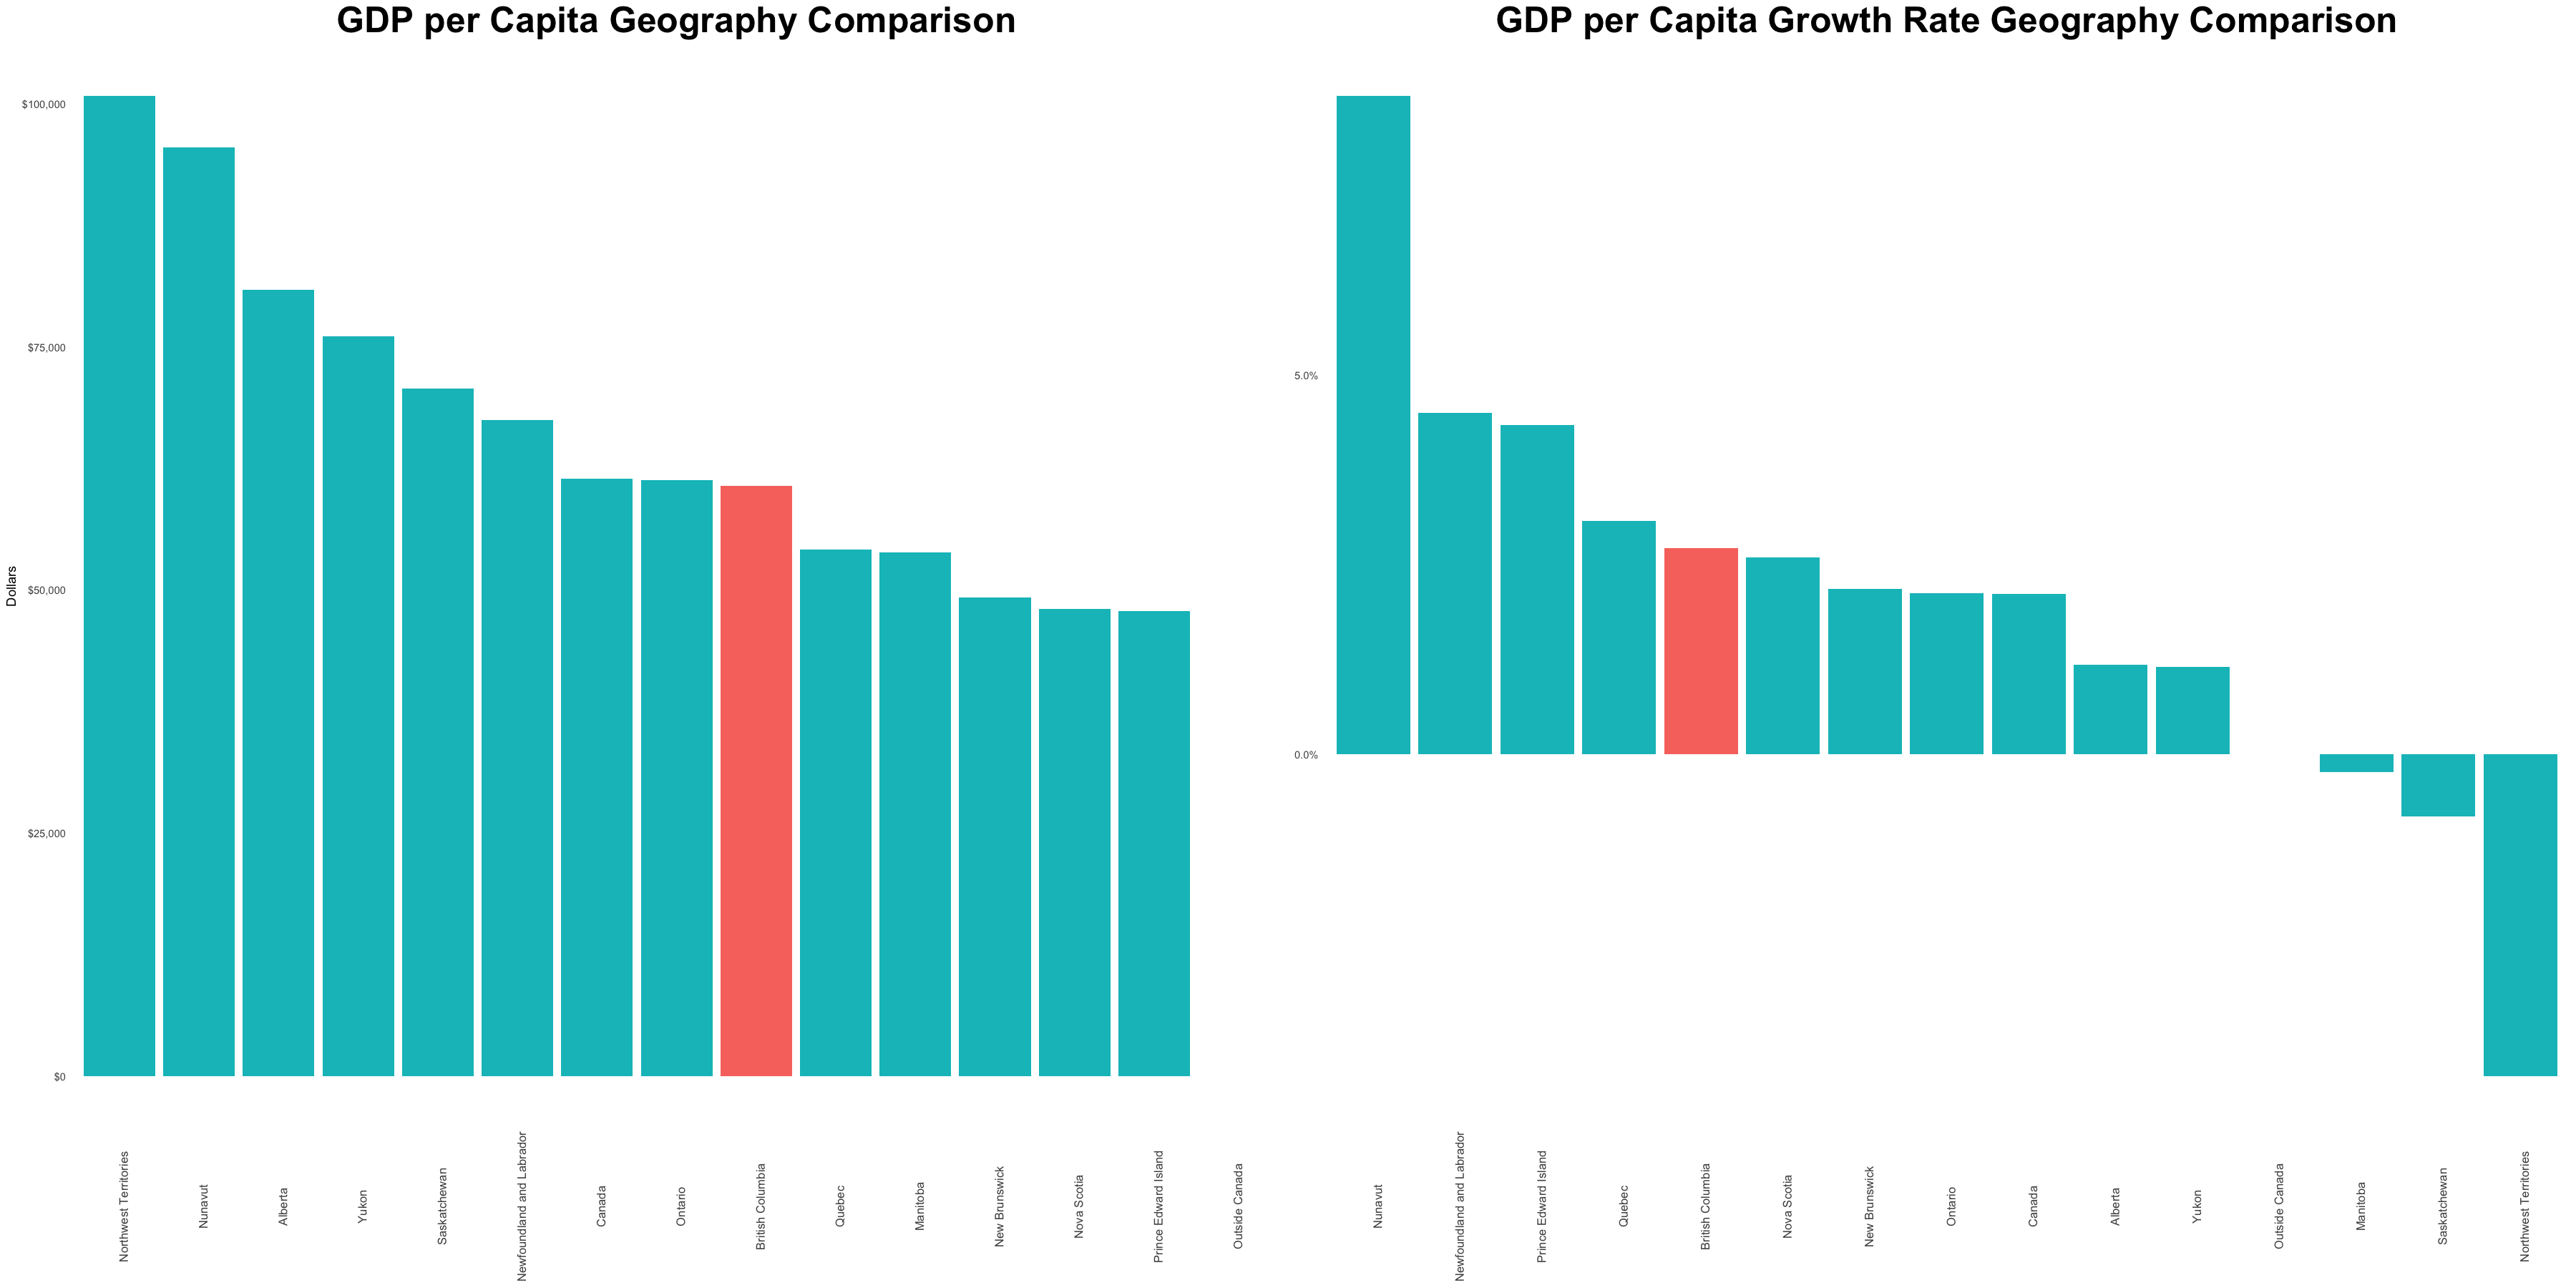

In [261]:
options(repr.plot.width=30, repr.plot.height=15)
third_gdp_capita

## 3rd Tab. "Other Economic Measurements Analysis"

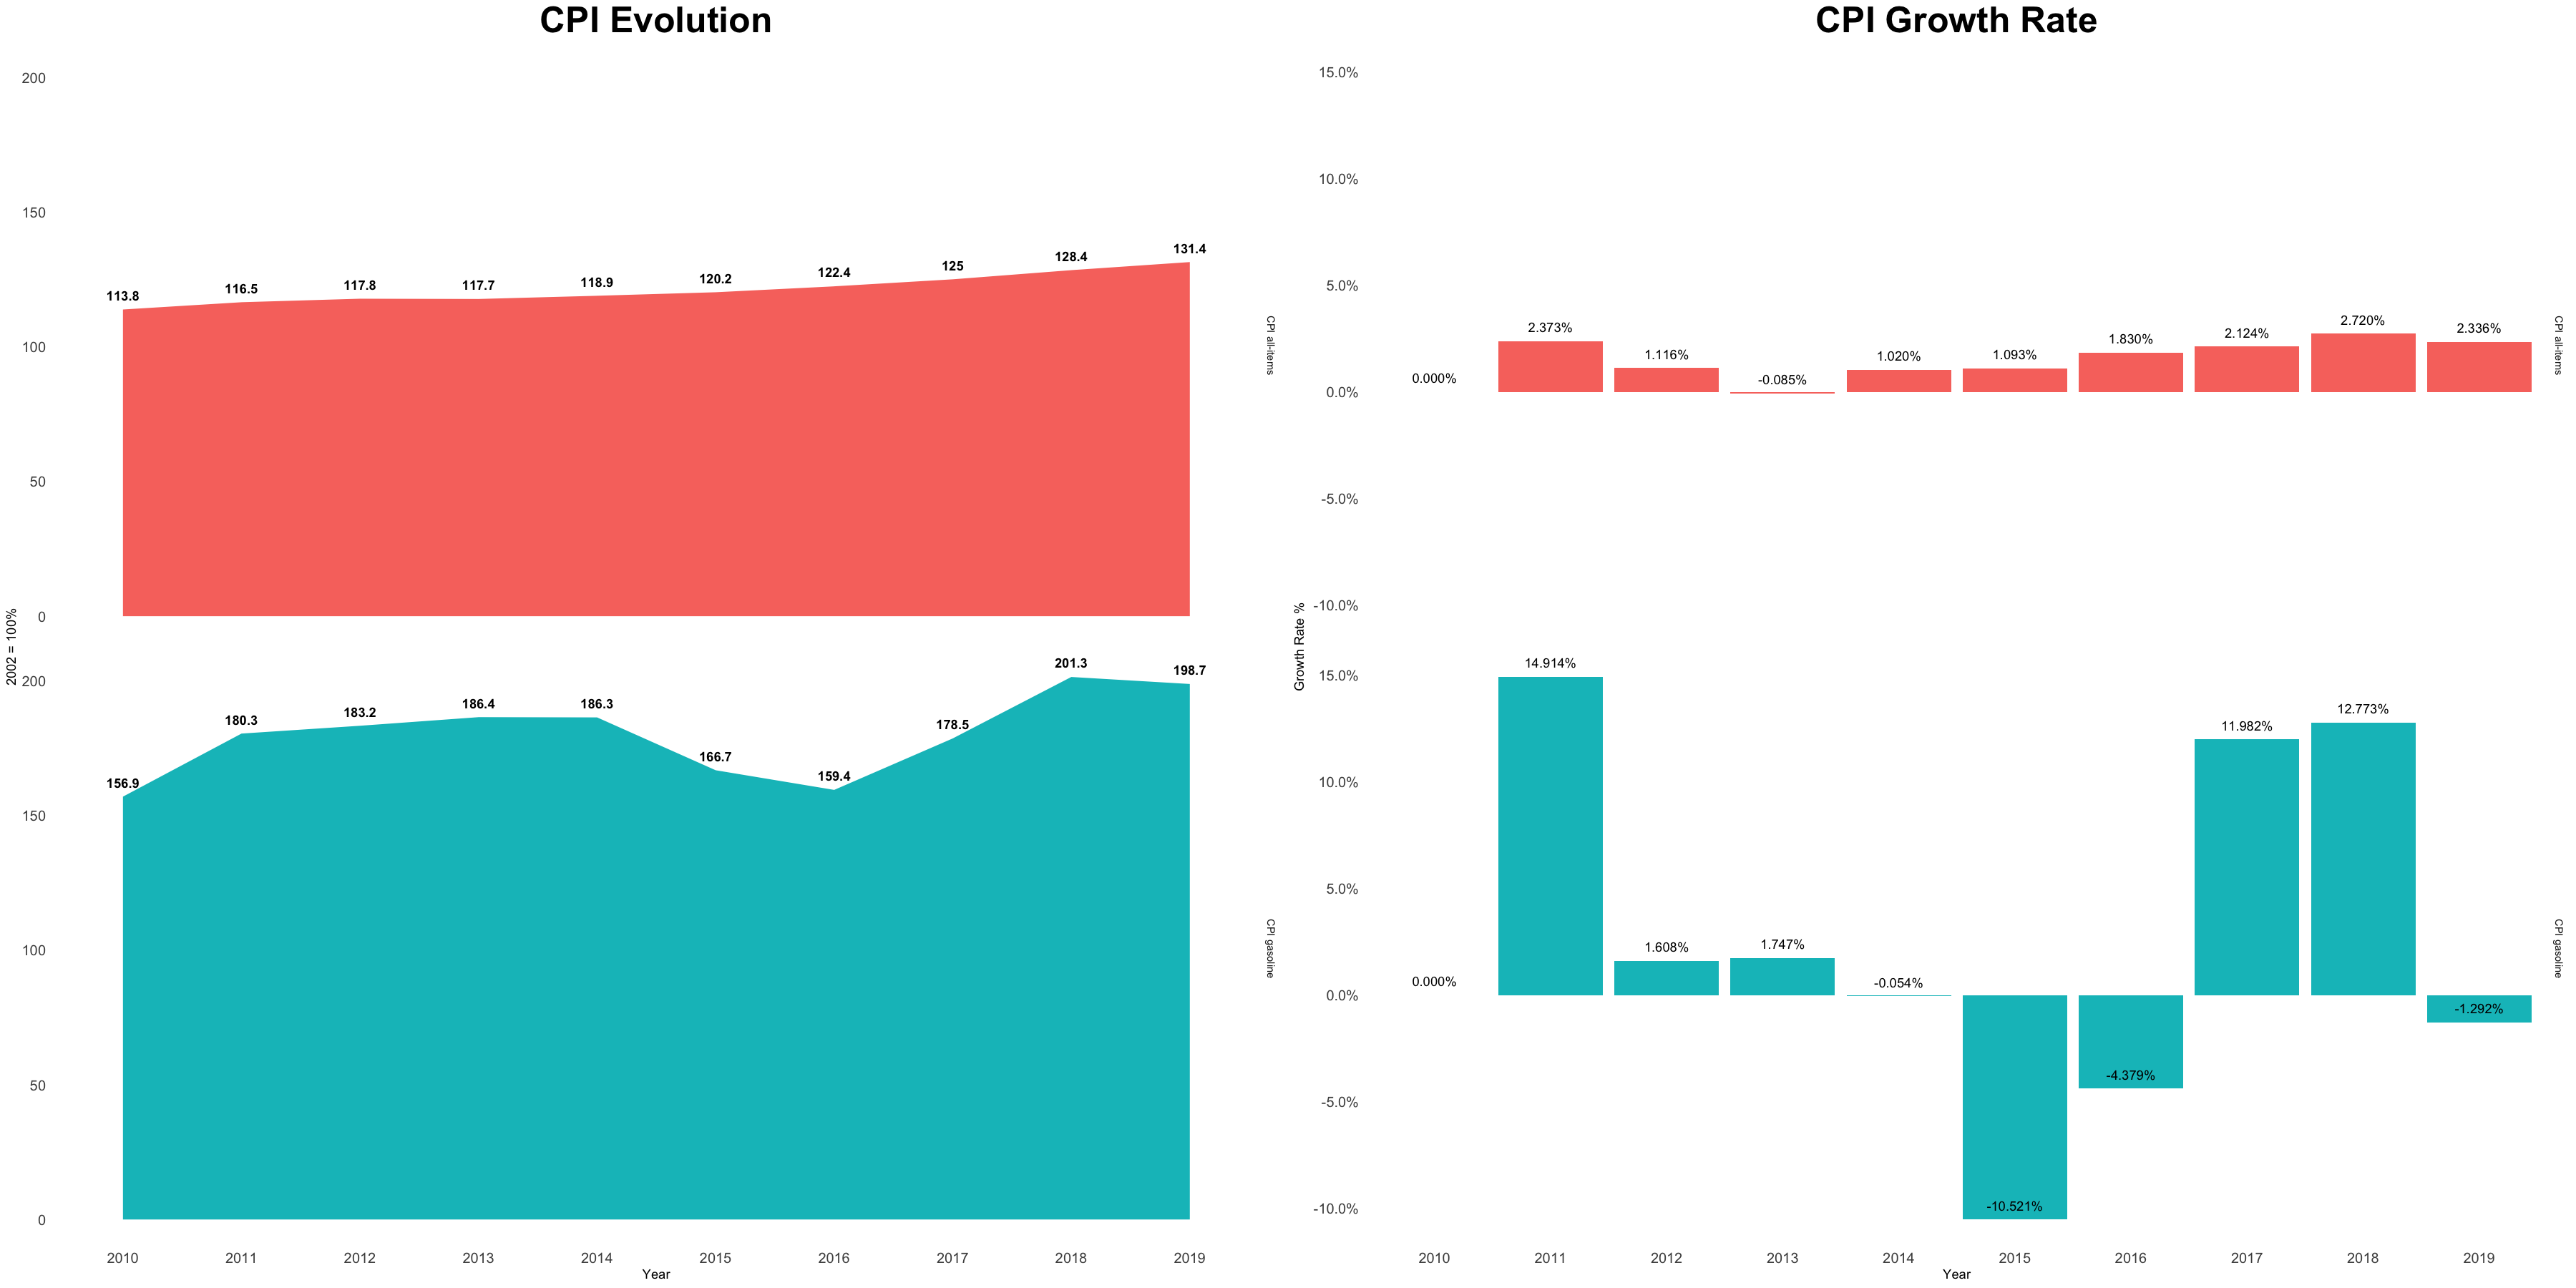

In [262]:
options(repr.plot.width=30, repr.plot.height=15)
first_cpi

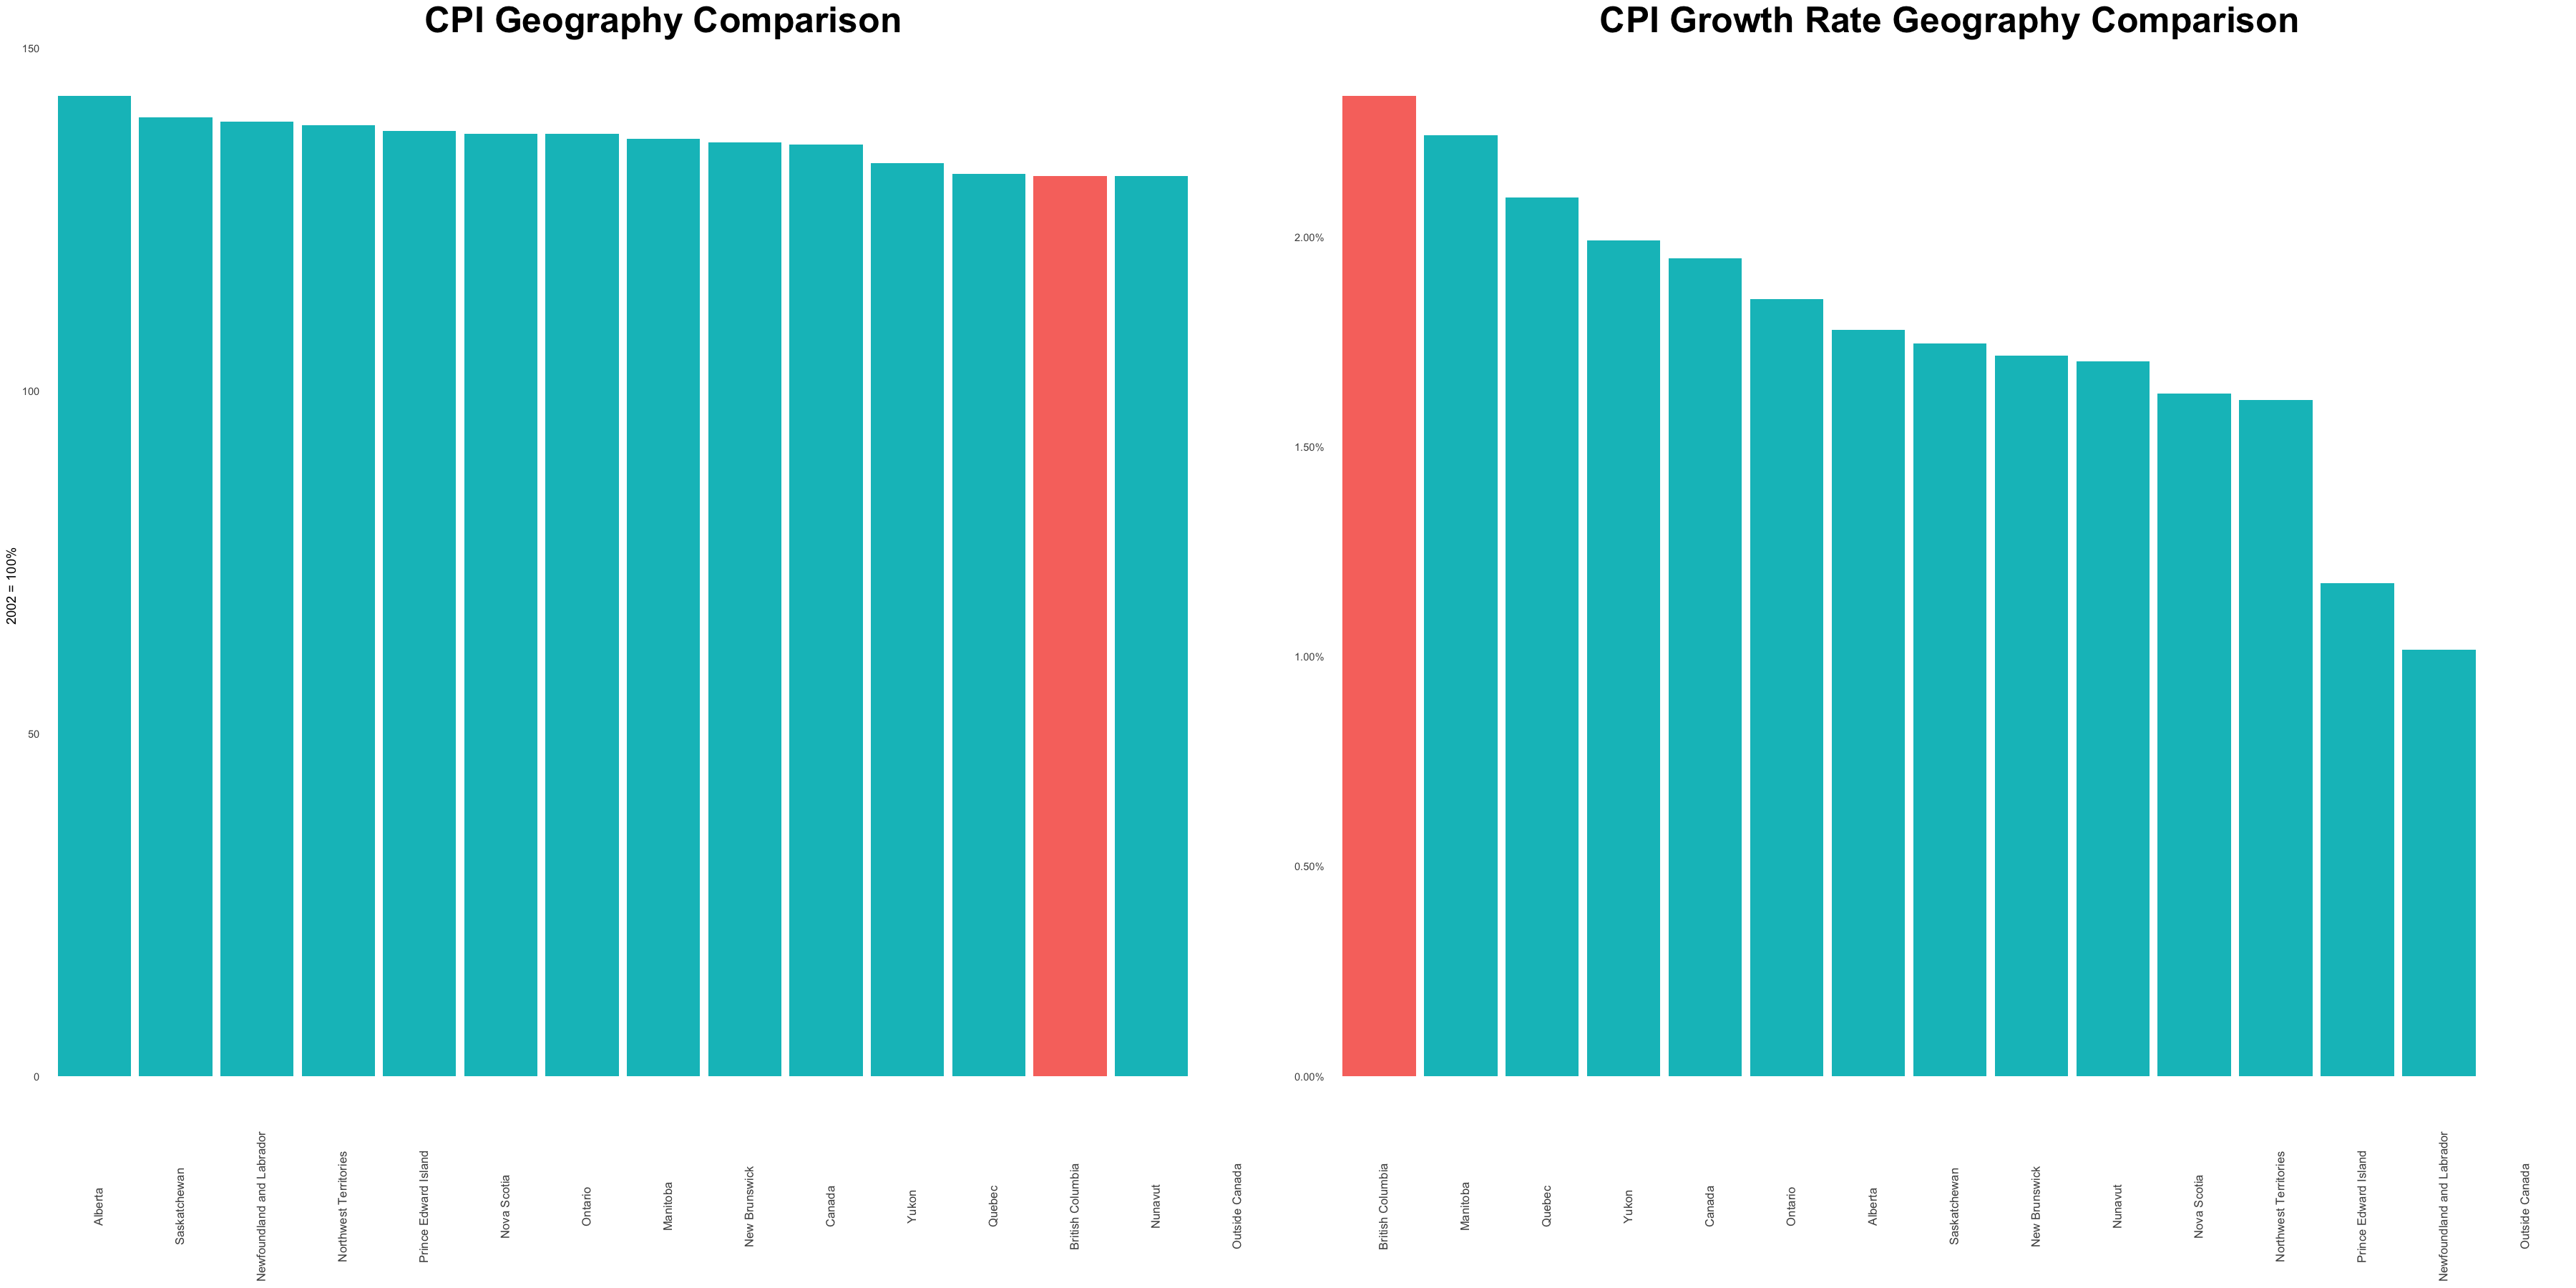

In [263]:
options(repr.plot.width=30, repr.plot.height=15)
second_cpi

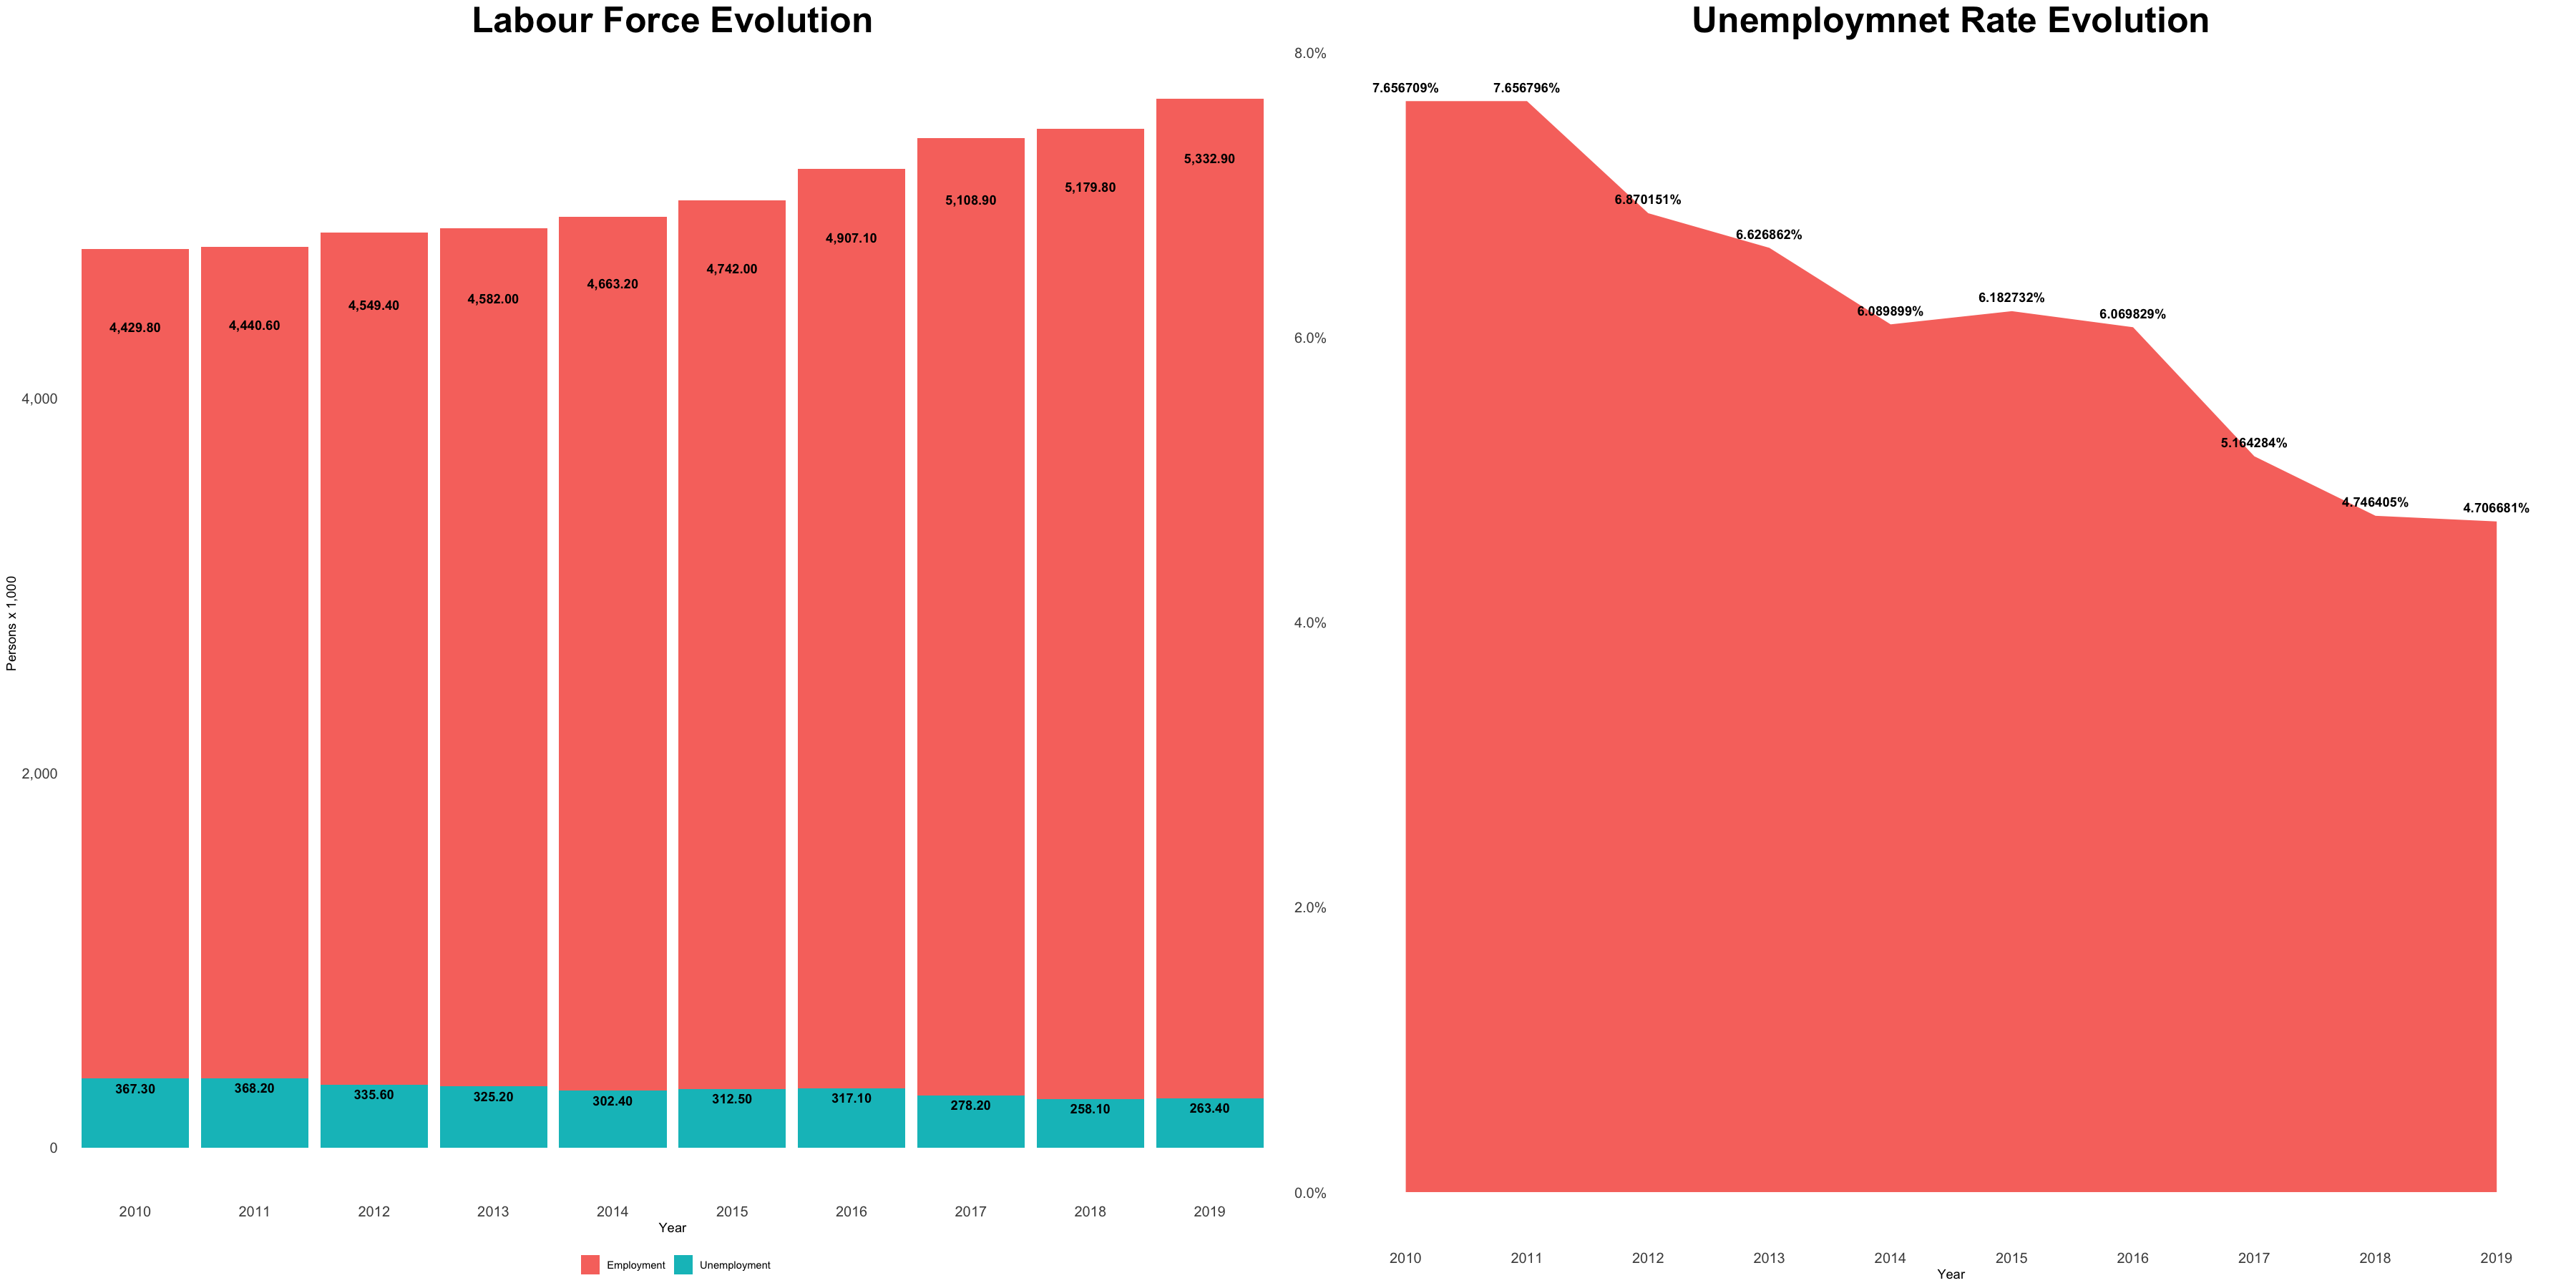

In [264]:
options(repr.plot.width=30, repr.plot.height=15)
first_employment

Warning message:
“Removed 4 rows containing missing values (position_stack).”


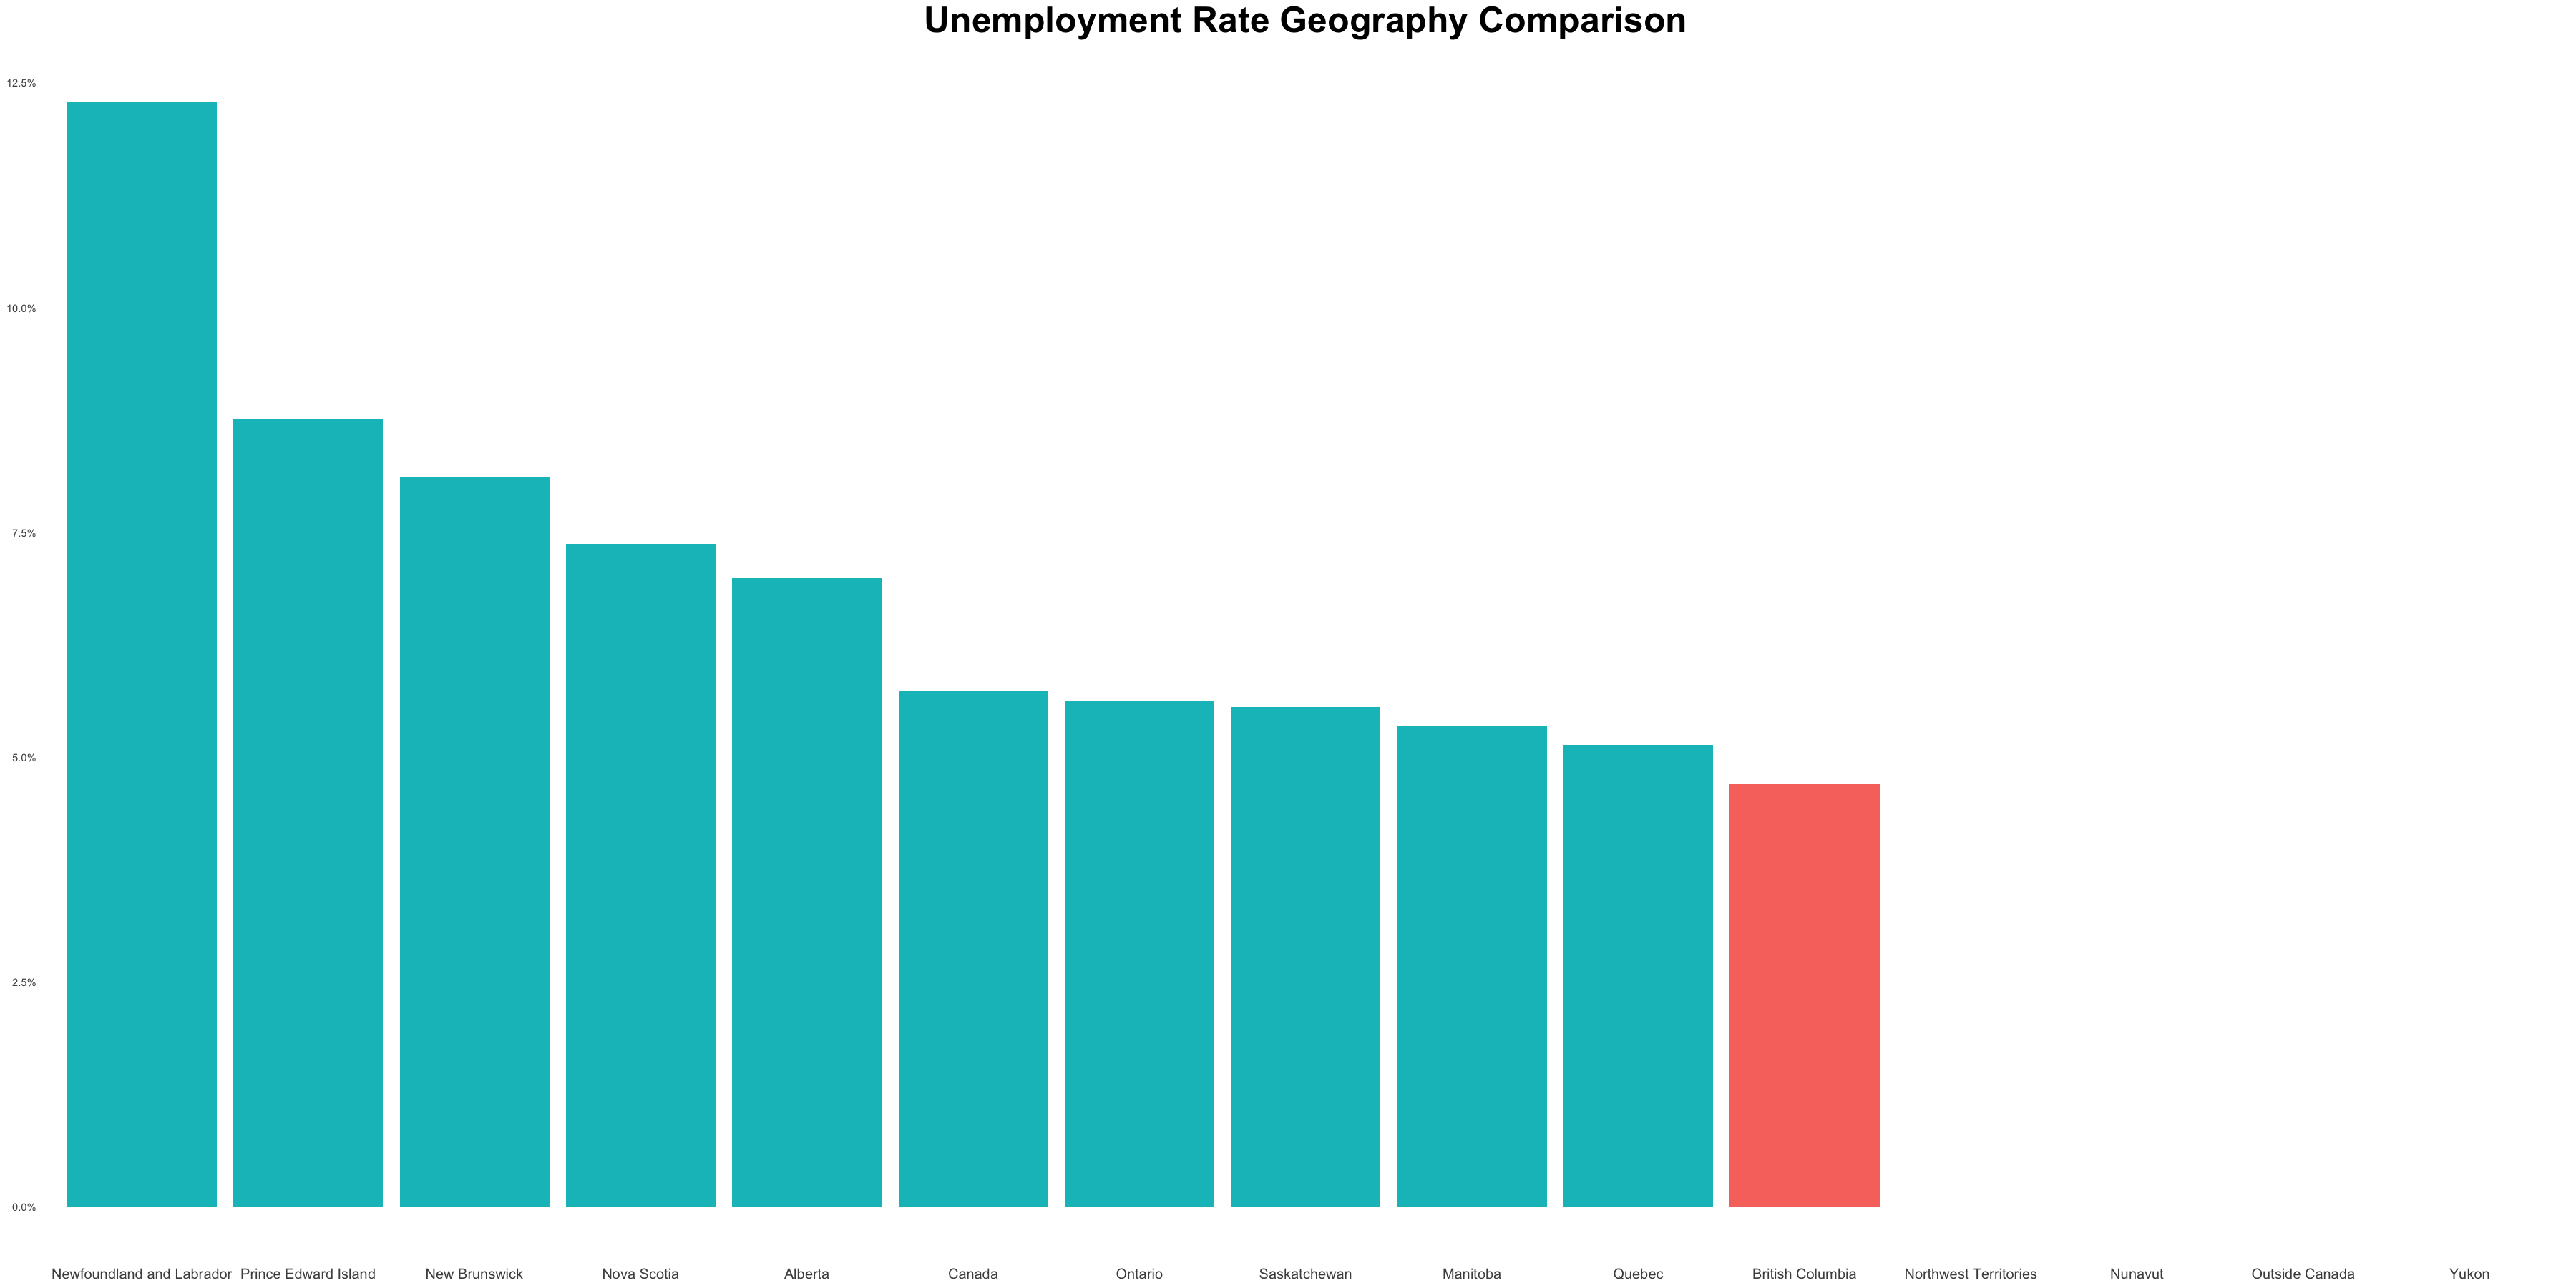

In [265]:
options(repr.plot.width=30, repr.plot.height=15)
second_employment

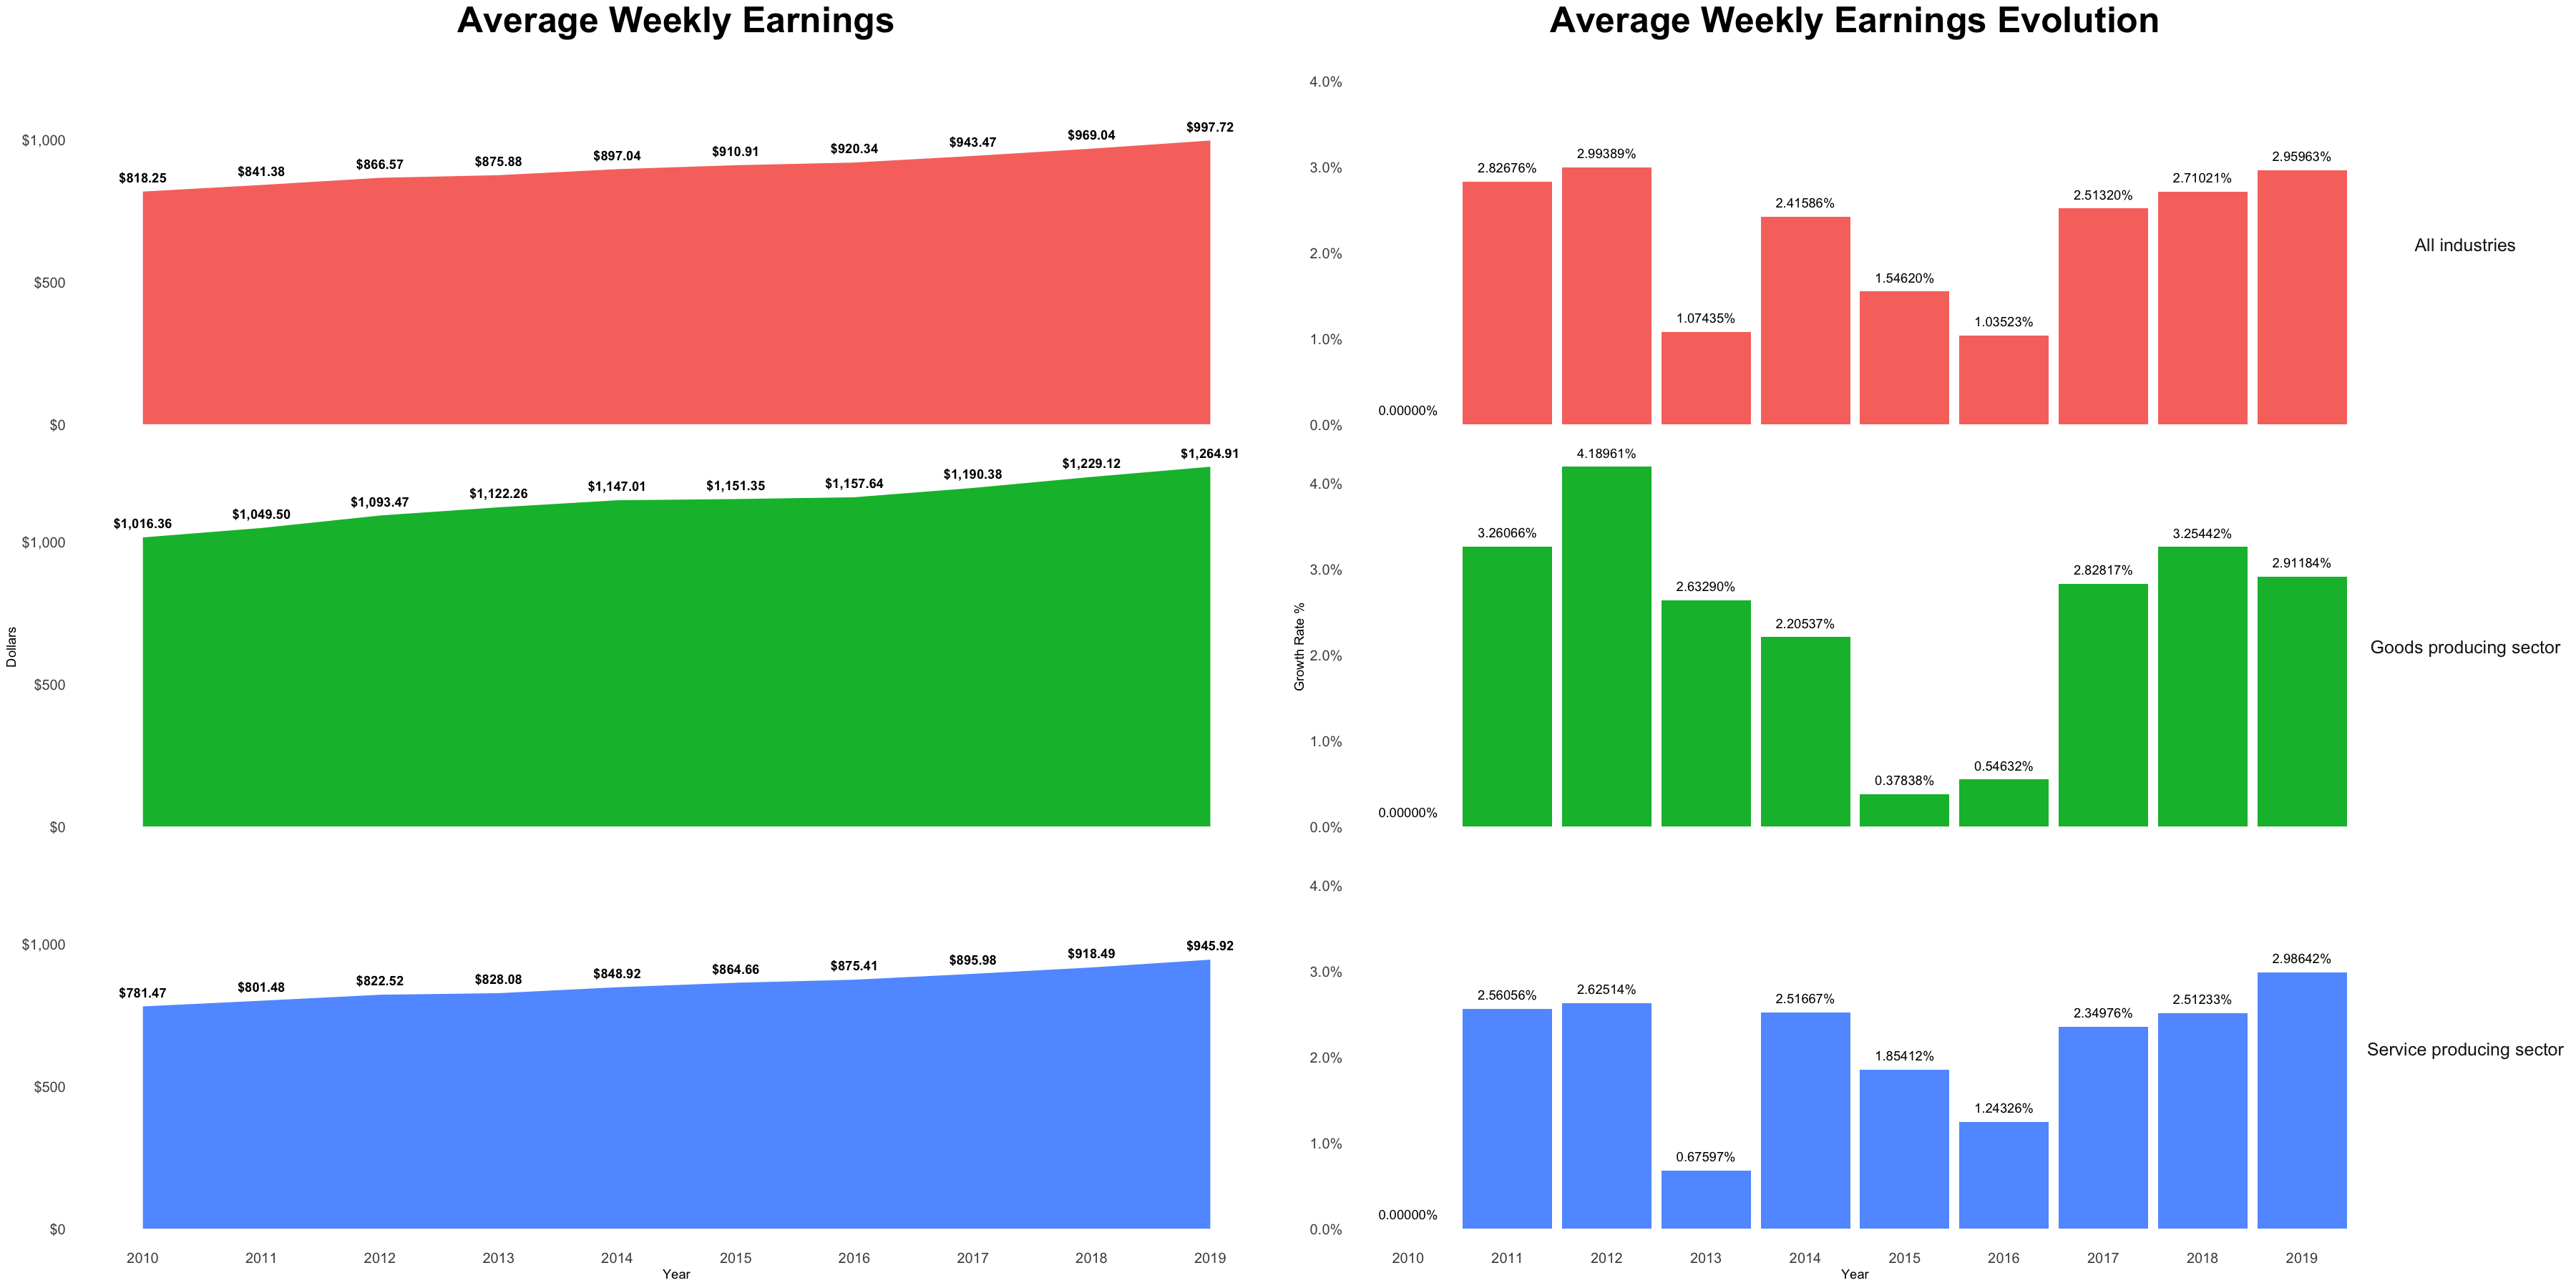

In [266]:
options(repr.plot.width=30, repr.plot.height=15)
first_earning

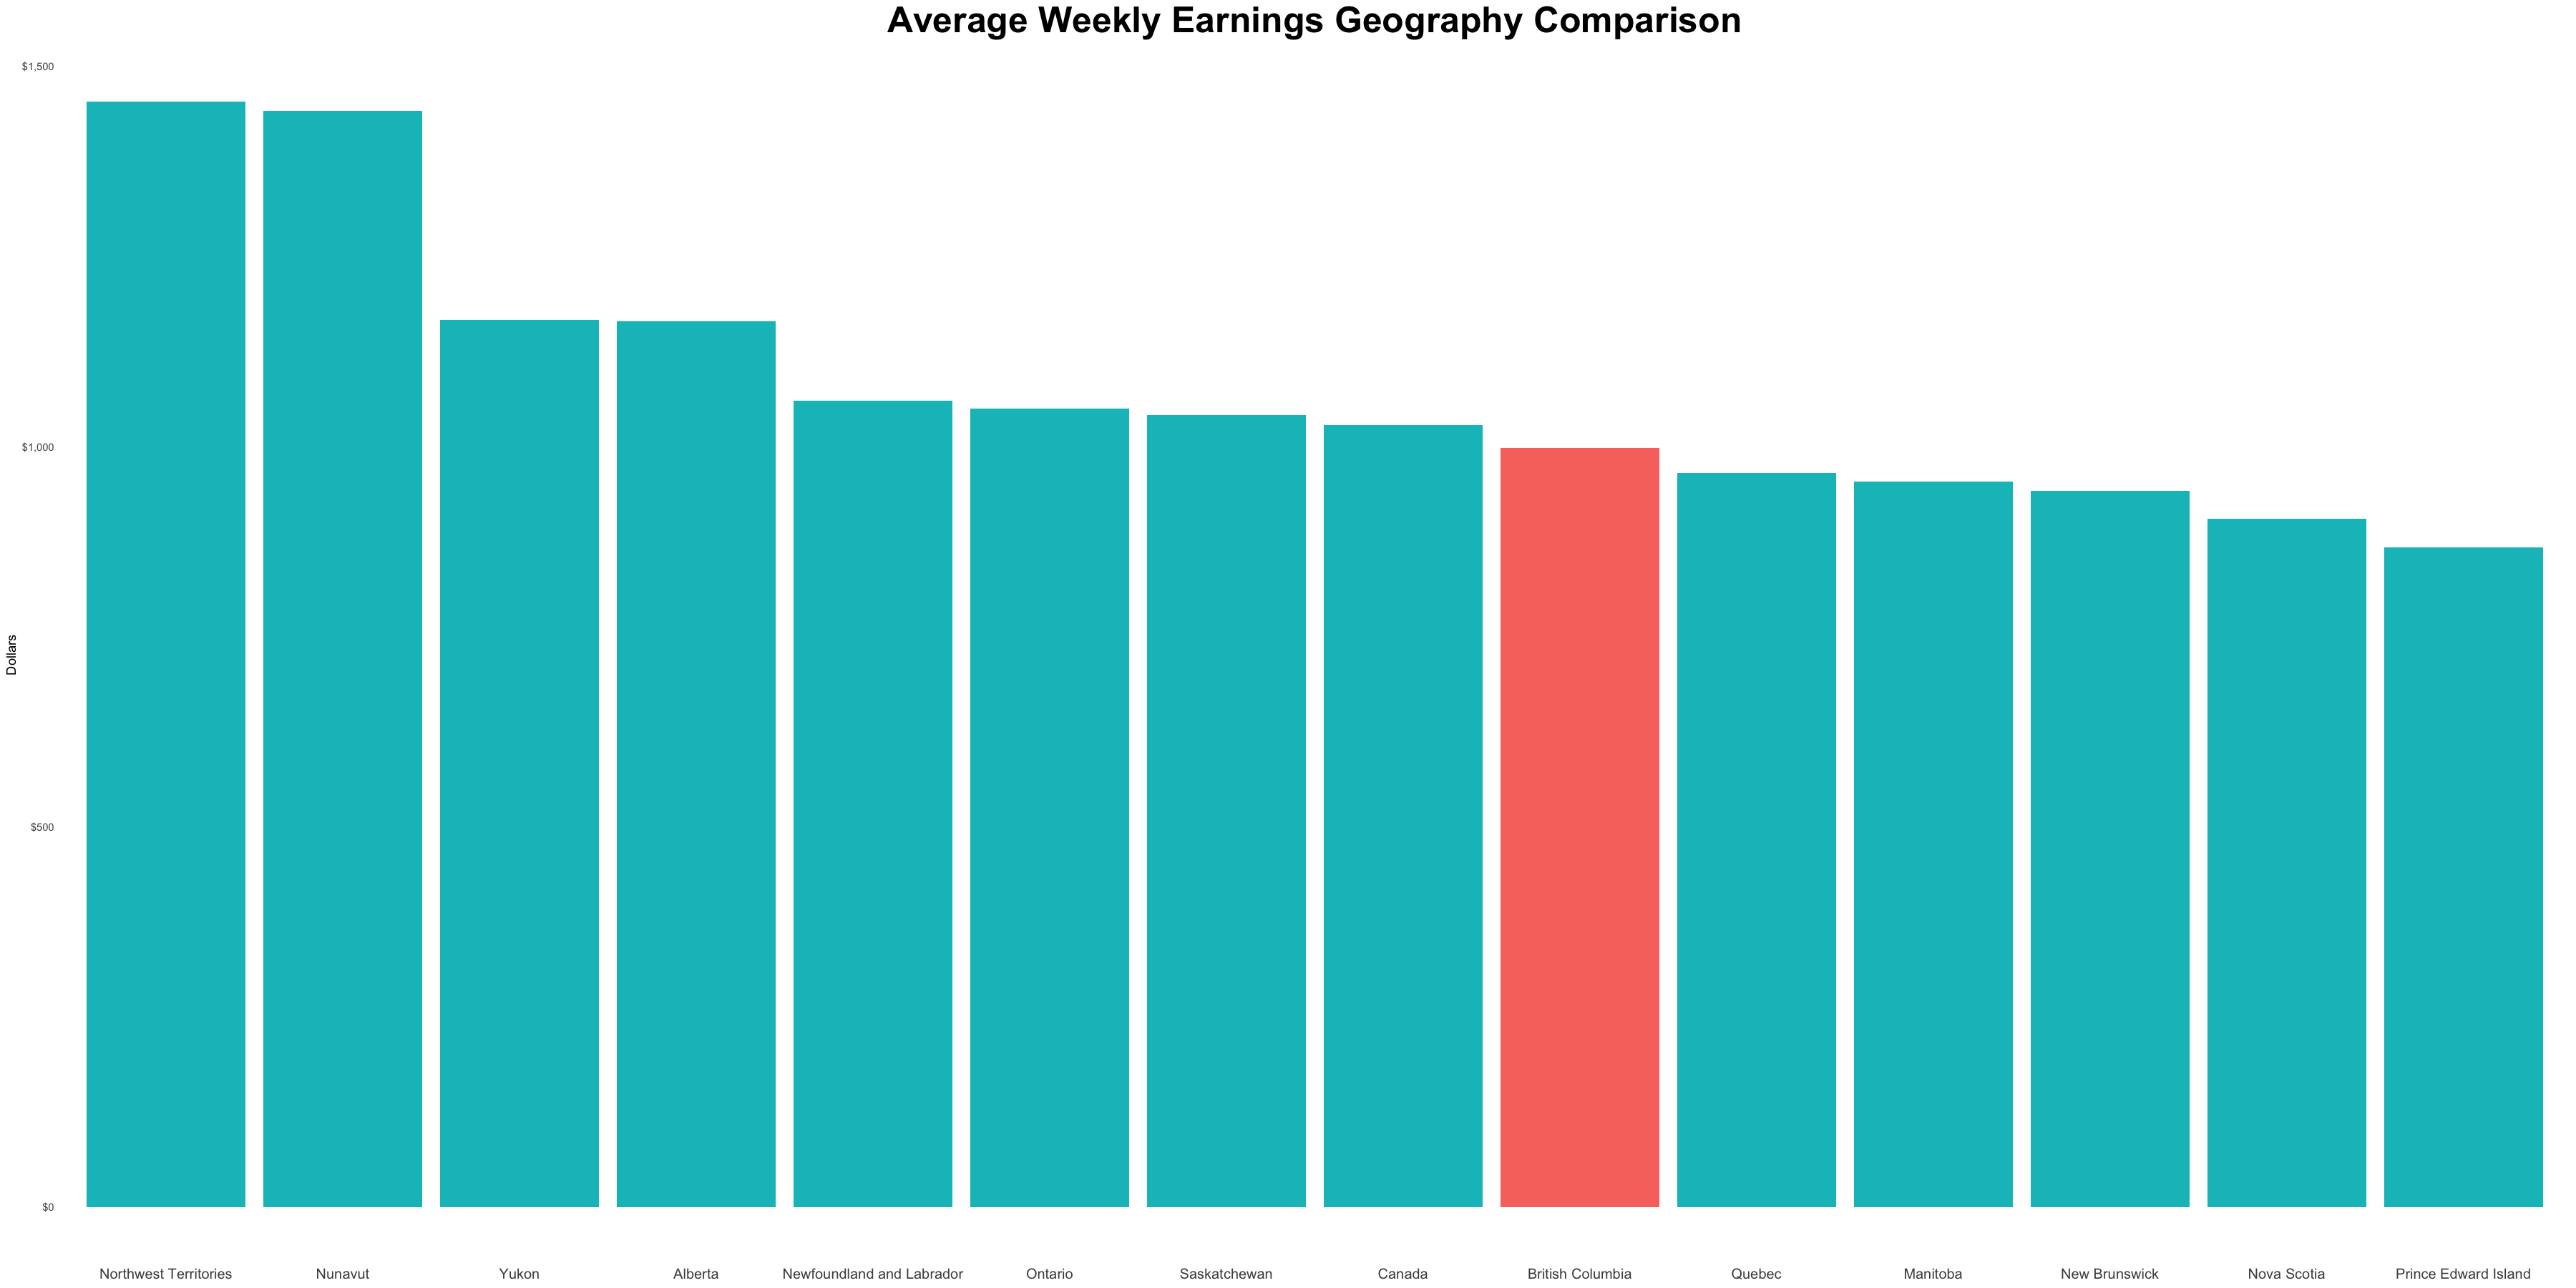

In [267]:
options(repr.plot.width=30, repr.plot.height=15)
second_earning